#### <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">Credit Card Users Churn Prediction
##### <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">Project 5

### by Anthony Amabile
Thera bank has seen a sharp decline in the number of credit card users.  Credit card customers are very valuable to the bank. If a credit card customer leaves, this results in a loss for the bank.

This project undertakes the opportunity to:  

1. Provide an analysis for why that is be occuring.
2. Develop a model to predict if a given customer will be leaving the credit card business line.


In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores and split data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import val_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)


from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier



# To use statistical functions
import scipy.stats as stats

from sklearn import metrics 

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To suppress the warning
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black


# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)


<IPython.core.display.Javascript object>

In [3]:
import os
os.chdir('/Users/Tony/Documents/Texas Austin AI ML/Feature Selection Model Selection and Tuning/Project 5')
os.getcwd()

'c:\\Users\\Tony\\Documents\\Texas Austin AI ML\\Feature Selection Model Selection and Tuning\\Project 5'

<IPython.core.display.Javascript object>

In [4]:
data = pd.read_csv('BankChurners.csv')
df = data.copy()
df.sample(10, random_state=1)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
6498  712389108  Existing Customer            43      F                2   
9013  718388733  Existing Customer            38      F                1   
2053  710109633  Existing Customer            39      M                2   
3211  717331758  Existing Customer            44      M                4   
5559  709460883  Attrited Customer            38      F                2   
6106  789105183  Existing Customer            54      M                3   
4150  771342183  Attrited Customer            53      F                3   
2205  708174708  Existing Customer            38      M                4   
4145  718076733  Existing Customer            43      M                1   
5324  821889858  Attrited Customer            50      F                1   

     Education_Level Marital_Status Income_Category Card_Category  \
6498        Graduate        Married  Less than $40K          Blue   
9013         College            NaN  Less than $40K          Blue   
2053         College        Married     $60K - $80K          Blue   
3211        Graduate        Married         $120K +          Blue   
5559       Doctorate        Married  Less than $40K          Blue   
6106   Post-Graduate         Single    $80K - $120K        Silver   
4150        Graduate         Single     $40K - $60K          Blue   
2205        Graduate        Married     $40K - $60K          Blue   
4145        Graduate         Single     $60K - $80K        Silver   
5324       Doctorate         Single             abc          Blue   

      Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
6498              36                         6                       3   
9013              32                         2                       3   
2053              31                         6                       3   
3211              32                         6                       3   
5559              28                         5                       2   
6106              42                         3                       1   
4150              40                         6                       3   
2205              27                         6                       2   
4145              31                         4                       3   
5324              46                         6                       4   

      Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
6498                      2      2570.000                 2107   
9013                      3      2609.000                 1259   
2053                      2      9871.000                 1061   
3211                      4     34516.000                 2517   
5559                      4      1614.000                    0   
6106                      2     34516.000                 2488   
4150                      2      1625.000                    0   
2205                      4      5535.000                 1276   
4145                      3     25824.000                 1170   
5324                      3      1970.000                 1477   

      Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
6498          463.000                 0.651             4058              83   
9013         1350.000                 0.871             8677              96   
2053         8810.000                 0.545             1683              34   
3211        31999.000                 0.765             4228              83   
5559         1614.000                 0.609             2437              46   
6106        32028.000                 0.552             4401              87   
4150         1625.000                 0.689             2314              43   
2205         4259.000                 0.636             1764              38   
4145        24654.000                 0.684             3101              73   
5324          493.000                 0.662             2493       

<IPython.core.display.Javascript object>

In [5]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the original dataset.')

There are 10127 rows and 21 columns in the original dataset.


<IPython.core.display.Javascript object>

In [6]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

<IPython.core.display.Javascript object>

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<IPython.core.display.Javascript object>

In [8]:
# checking for duplicate values
dup_data = df.duplicated().sum()

print(f'There is {dup_data} duplicate data.')

There is 0 duplicate data.


<IPython.core.display.Javascript object>

There are no duplicate values. There are some null and NaN values that will need to be examined and treated.

In addition, the string attribute columns of Attrition_Flag, Gender, and Marital_Status will need to be converted to dummy columns. We will revisit this when building our model.

The columns of Education_Level, Income_Category, and Card_Category will need to be converted to categorical numerical values before our model is created as well.

In [9]:
# counting the number of missing values per row
df.isnull().sum(axis=1).value_counts()

0    7973
1    2040
2     114
dtype: int64

<IPython.core.display.Javascript object>

No row has more than 2 missing values in it.

In [10]:
pd.options.display.float_format = '{:,.2f}'.format
df.isnull().sum(axis=1).value_counts()/df.shape[0]

0   0.79
1   0.20
2   0.01
dtype: float64

<IPython.core.display.Javascript object>

However, roughly 21% of the rows have at least one null value.

In [11]:

num_missing = df.isnull().sum(axis=1)
df[num_missing == 2].sample(n=10)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
9677  721107258  Existing Customer            45      F                5   
1456  755959683  Existing Customer            50      F                5   
496   708095133  Existing Customer            43      M                4   
8625  721190358  Existing Customer            49      M                4   
8166  712228458  Existing Customer            50      M                2   
8965  751974258  Existing Customer            51      M                3   
8768  818476383  Existing Customer            50      M                1   
8750  715624533  Existing Customer            41      F                3   
7863  787481208  Existing Customer            46      F                1   
1548  788789658  Existing Customer            40      M                5   

     Education_Level Marital_Status Income_Category Card_Category  \
9677             NaN            NaN  Less than $40K          Blue   
1456             NaN            NaN             abc          Blue   
496              NaN            NaN         $120K +          Blue   
8625             NaN            NaN    $80K - $120K          Blue   
8166             NaN            NaN         $120K +          Blue   
8965             NaN            NaN         $120K +          Blue   
8768             NaN            NaN         $120K +        Silver   
8750             NaN            NaN     $40K - $60K          Blue   
7863             NaN            NaN  Less than $40K          Blue   
1548             NaN            NaN    $80K - $120K          Blue   

      Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
9677              37                         2                       2   
1456              43                         5                       1   
496               34                         5                       2   
8625              29                         2                       2   
8166              32                         2                       3   
8965              44                         2                       2   
8768              45                         2                       2   
8750              30                         1                       2   
7863              34                         1                       3   
1548              22                         6                       1   

      Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
9677                      2      5,465.00                 1967   
1456                      2      3,410.00                 2281   
496                       2     33,304.00                 1833   
8625                      2     29,690.00                 2517   
8166                      1     25,645.00                 1083   
8965                      3     11,954.00                    0   
8768                      0     34,516.00                 1514   
8750                      3      5,357.00                 1272   
7863                      1      2,762.00                 1793   
1548                      4      4,042.00                 1744   

      Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
9677         3,498.00                  0.64            14192             115   
1456         1,129.00                  0.52             1296              31   
496         31,471.00                  0.43             1448              29   
8625        27,173.00                  0.77             7640              86   
8166        24,562.00                  0.76             4302              63   
8965        11,954.00                  0.78             7345              93   
8768        33,002.00                  0.74             7333              72   
8750         4,085.00                  0.71             7730              97   
7863           969.00                  0.90             5006              78   
1548         2,298.00                  0.58             1471       

<IPython.core.display.Javascript object>

In [12]:
df[num_missing == 1].sample(n=100)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
9528  809459733  Existing Customer            43      F                4   
5617  718404783  Attrited Customer            59      F                0   
9399  713550483  Existing Customer            45      M                4   
571   708864708  Existing Customer            46      M                3   
7994  713798958  Existing Customer            38      F                3   
...         ...                ...           ...    ...              ...   
7087  711765708  Existing Customer            39      F                1   
1975  714073983  Existing Customer            47      M                2   
5142  716600733  Attrited Customer            47      F                4   
5932  713374533  Existing Customer            52      F                1   
2364  786566733  Existing Customer            49      M                2   

     Education_Level Marital_Status Income_Category Card_Category  \
9528             NaN         Single  Less than $40K          Blue   
5617             NaN        Married             abc          Blue   
9399        Graduate            NaN     $60K - $80K          Blue   
571          College            NaN    $80K - $120K          Blue   
7994             NaN         Single  Less than $40K          Blue   
...              ...            ...             ...           ...   
7087        Graduate            NaN  Less than $40K          Blue   
1975             NaN         Single     $40K - $60K          Blue   
5142             NaN        Married  Less than $40K          Blue   
5932             NaN         Single     $40K - $60K          Blue   
2364             NaN         Single    $80K - $120K          Blue   

      Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
9528              38                         2                       1   
5617              49                         5                       2   
9399              33                         1                       5   
571               36                         4                       2   
7994              36                         2                       3   
...              ...                       ...                     ...   
7087              36                         3                       4   
1975              36                         6                       3   
5142              36                         3                       3   
5932              43                         4                       2   
2364              43                         3                       3   

      Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
9528                      2      3,220.00                    0   
5617                      4      6,996.00                    0   
9399                      1      8,670.00                 1930   
571                       2     24,869.00                 1729   
7994                      1      1,946.00                 1430   
...                     ...           ...                  ...   
7087                      1      6,690.00                 1912   
1975                      3      7,327.00                    0   
5142                      3      2,033.00                  228   
5932                      2      1,981.00                 1082   
2364                      5      4,939.00                 1190   

      Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
9528         3,220.00                  0.78            13339              90   
5617         6,996.00                  0.87             2384              33   
9399         6,740.00                  0.93            13767              96   
571         23,140.00                  0.41             1409              36   
7994           516.00                  0.56             4643              87   
...               ...                   ...              ...             ...   
7087         4,778.00 

<IPython.core.display.Javascript object>

For Education_Level (object) and Marital_Status (object),the mode will be inputed in place of null values.

In [13]:
df['Education_Level'].fillna(df['Education_Level'].mode()[0], inplace=True)
df['Marital_Status'].fillna(df['Marital_Status'].mode()[0], inplace=True)


<IPython.core.display.Javascript object>

In [14]:
df.isnull().sum(axis=1).value_counts()/df.shape[0]

0   1.00
dtype: float64

<IPython.core.display.Javascript object>

All of the NaN values have been addressed.

In [15]:
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

<IPython.core.display.Javascript object>

In [16]:
df.describe().T

count           mean           std  \
CLIENTNUM                10,127.00 739,177,606.33 36,903,783.45   
Customer_Age             10,127.00          46.33          8.02   
Dependent_count          10,127.00           2.35          1.30   
Months_on_book           10,127.00          35.93          7.99   
Total_Relationship_Count 10,127.00           3.81          1.55   
Months_Inactive_12_mon   10,127.00           2.34          1.01   
Contacts_Count_12_mon    10,127.00           2.46          1.11   
Credit_Limit             10,127.00       8,631.95      9,088.78   
Total_Revolving_Bal      10,127.00       1,162.81        814.99   
Avg_Open_To_Buy          10,127.00       7,469.14      9,090.69   
Total_Amt_Chng_Q4_Q1     10,127.00           0.76          0.22   
Total_Trans_Amt          10,127.00       4,404.09      3,397.13   
Total_Trans_Ct           10,127.00          64.86         23.47   
Total_Ct_Chng_Q4_Q1      10,127.00           0.71          0.24   
Avg_Utilization_Ratio    10,127.00           0.27          0.28   

                                    min            25%            50%  \
CLIENTNUM                708,082,083.00 713,036,770.50 717,926,358.00   
Customer_Age                      26.00          41.00          46.00   
Dependent_count                    0.00           1.00           2.00   
Months_on_book                    13.00          31.00          36.00   
Total_Relationship_Count           1.00           3.00           4.00   
Months_Inactive_12_mon             0.00           2.00           2.00   
Contacts_Count_12_mon              0.00           2.00           2.00   
Credit_Limit                   1,438.30       2,555.00       4,549.00   
Total_Revolving_Bal                0.00         359.00       1,276.00   
Avg_Open_To_Buy                    3.00       1,324.50       3,474.00   
Total_Amt_Chng_Q4_Q1               0.00           0.63           0.74   
Total_Trans_Amt                  510.00       2,155.50       3,899.00   
Total_Trans_Ct                    10.00          45.00          67.00   
Total_Ct_Chng_Q4_Q1                0.00           0.58           0.70   
Avg_Utilization_Ratio              0.00           0.02           0.18   

                                    75%            max  
CLIENTNUM                773,143,533.00 828,343,083.00  
Customer_Age                      52.00          73.00  
Dependent_count                    3.00           5.00  
Months_on_book                    40.00          56.00  
Total_Relationship_Count           5.00           6.00  
Months_Inactive_12_mon             3.00           6.00  
Contacts_Count_12_mon              3.00           6.00  
Credit_Limit                  11,067.50      34,516.00  
Total_Revolving_Bal            1,784.00       2,517.00  
Avg_Open_To_Buy                9,859.00      34,516.00  
Total_Amt_Chng_Q4_Q1               0.86           3.40  
Total_Trans_Amt                4,741.00      18,484.00  
Total_Trans_Ct                    81.00         139.00  
Total_Ct_Chng_Q4_Q1                0.82           3.71  
Avg_Utilization_Ratio              0.50           1.00

<IPython.core.display.Javascript object>

Observations
1. There are 10,127 customers in our data set.  
2. The median age for customers in the data set is 46.
3. The typical customer has 2 dependents.
4. The typical customer has a relationship with the bank of roughly 3 years.
5. The typical customer has 4 products from the bank.
6. The typical customer only has roughly 2 months of inactivity. 
7. The typical customer has roughly 2-3 contracts with the bank in the last 12 months.
8. The typical customer has a credit limit of roughly $4,550.
9. The typical customer has a revolving balance of roughly $1,276.
10. The typical customer has a typically has about $3,474 on their credit card available to use.
11. The typical customer has a Q4 to Q1 ratio of amount of transactions of roughly .74; spending is higher in Q1 compared to Q4.
12. The typical customer has a 12-month transaction amount of $3,899.
13. The typical customer has a total of 67 transactions.
14. The typical customer has a Q4 to Q1 ratio number of transactions of roughly .70; more transactions are made in Q1 compared to Q4.
15. The typical customer has an average utilization ratio of .18.

### EDA

### Univariate analysis

In [17]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Observations on Customer Age

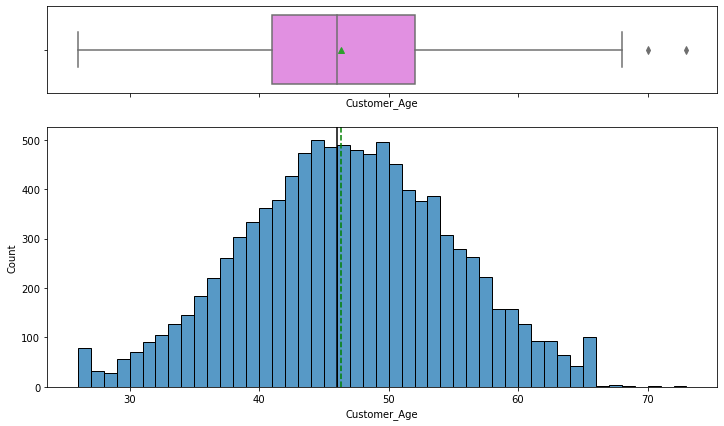

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(df, "Customer_Age")

* The distribution of the number customer age is fairly normal.
* The boxplot shows that there are few outliers to the right for this variable.
* From the boxplot, we can see that the third quartile (Q3) is approximately equal to 53 which means 75% of customers are younger than 53 pregnancies and an average age of 46.

### Observations on Dependent Count

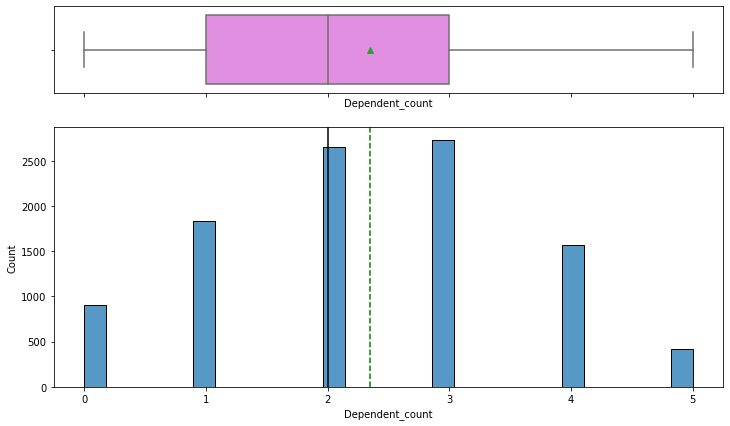

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(df, "Dependent_count")

* The distribution of the number dependent count is fairly normal.
* The boxplot shows that there are no outliers.
* From the boxplot, we can see that the third quartile (Q3) is equal to 3 which means 75% of customers have less than 3 dependents and an average of 2.

### Observations on Months on Book

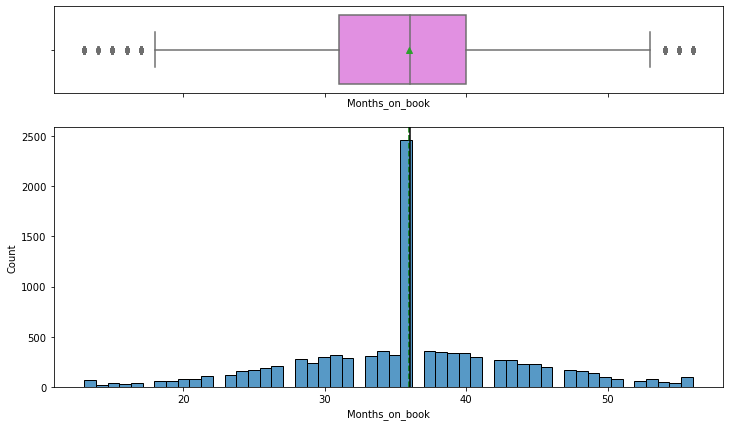

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(df, "Months_on_book")

* The distribution of the number dependent count is fairly normal with a high concentration near the average of 36 months.
* The boxplot shows that there are a few outliers on the left as well as the right.
* From the boxplot, we can see that the third quartile (Q3) is equal to roughly 40 which means 75% of customers have less than 40 months or roughly 3 years of history with the bank.

### Observations on Total Relationship Count

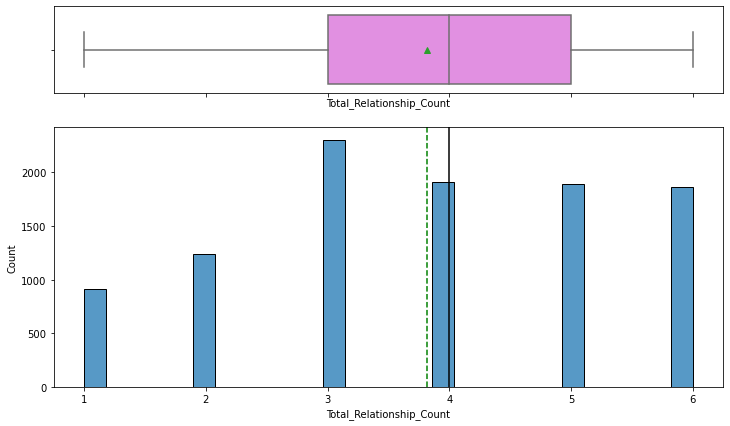

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(df, "Total_Relationship_Count")

* The distribution of the number dependent count, while fairly normal, is slightly left skewed.
* The boxplot shows that there are no outliers.
* From the boxplot, we can see that the third quartile (Q3) is equal to 5 which means 75% of customers have less than 5 products of the banks with an average of 4.

### Observations on Months Inactive in the Last 12 Months

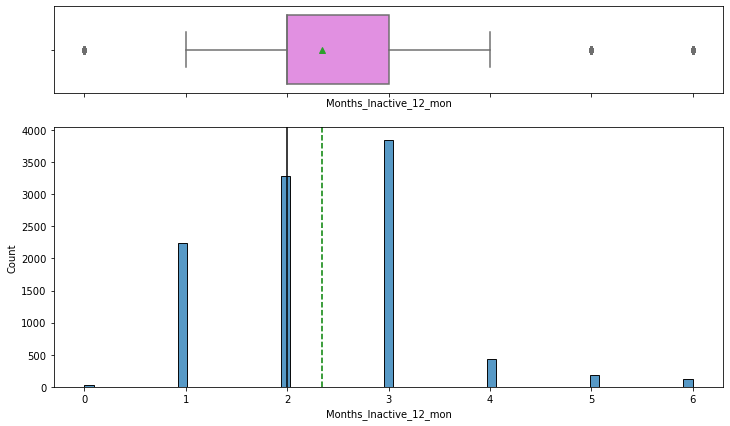

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(df, "Months_Inactive_12_mon")

* The distribution of months inactive (in the past 12 months) is fairly normal.
* The boxplot shows that there are a few outliers on the left as well as on the right.
* From the boxplot, we can see that the third quartile (Q3) is equal to 3 which means 75% of customers have less than 3 months of inactivity in the last 12 months with an average of roughly 2.

### Observations on Contacts Count in the Last 12 Months

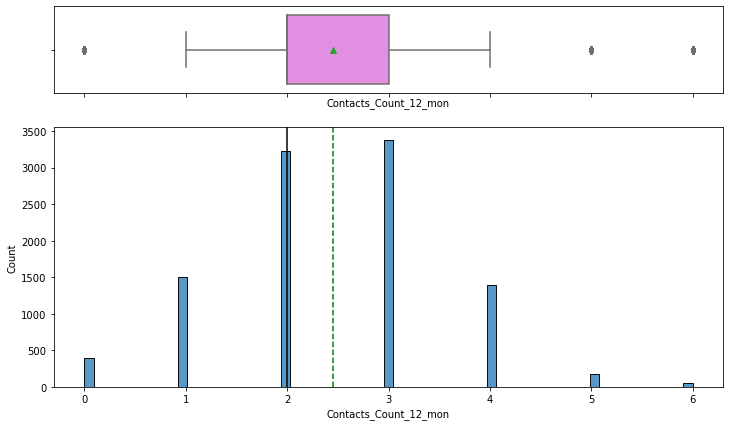

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(df, "Contacts_Count_12_mon")

* The distribution of the contact count with the bank is fairly normal.
* The boxplot shows that there is one outlier on the left as well as a couple on the right.
* From the boxplot, we can see that the third quartile (Q3) is equal to 3 which means 75% of customers have less than 3 contacts with the bank in the last 12 months with an average of  2.5.

### Observations on Credit Limit

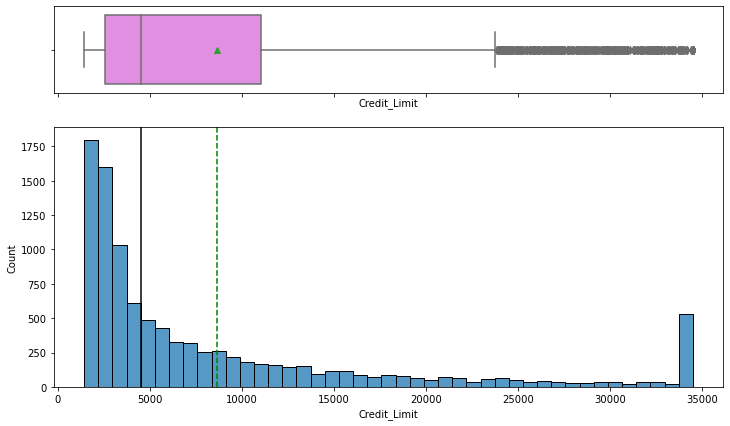

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(df, "Credit_Limit")

* The distribution of the credit limit is right skewed.
* The boxplot shows that there are several outliers on the right.
* From the boxplot, we can see that the third quartile (Q3) is rouhgly equal to 11,000 which means 75% of customers have a credit limit of less than 11,000 with an average of roughly 8,100.

### Observations on Total Revolving Balance

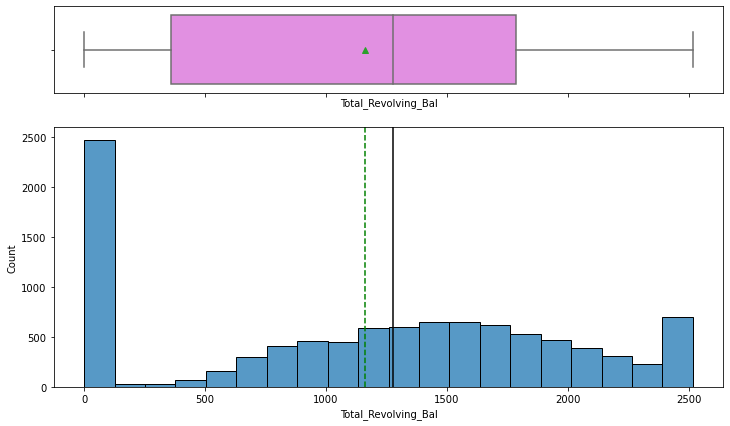

<IPython.core.display.Javascript object>

In [25]:
histogram_boxplot(df, "Total_Revolving_Bal")

* The distribution of total revolving balance is fairly normal.
* The boxplot shows that there are no outliers.
* From the boxplot, we can see that the third quartile (Q3) is rouhgly equal to 1700 which means 75% of customers have a total revolving balance of less than $1,700 with an average of roughly $1,100. There are many customers with a balance of zero.

### Observations on Average Open to Buy

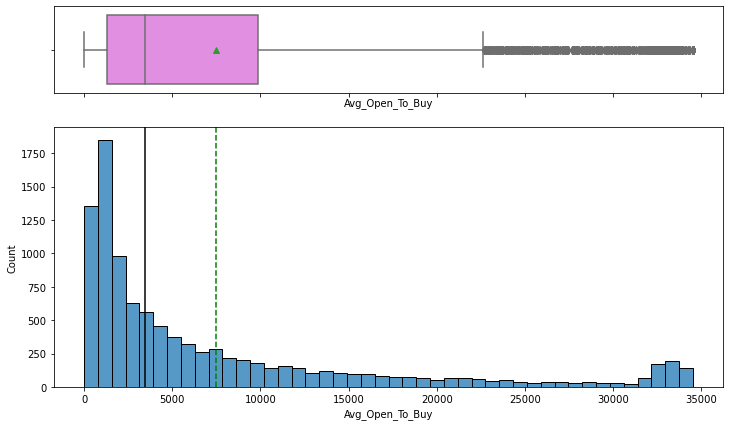

<IPython.core.display.Javascript object>

In [26]:
histogram_boxplot(df, "Avg_Open_To_Buy")

* The distribution of average open to buy is right-skewed.
* The boxplot shows that there are many outliers to the right.
* From the boxplot, we can see that the third quartile (Q3) is rouhgly equal to 10,000 which means 75% of customers have a total available balance of less than $10,000 with an average of roughly $7,500. 

### Observations on Total Amount Change Q4 to Q1

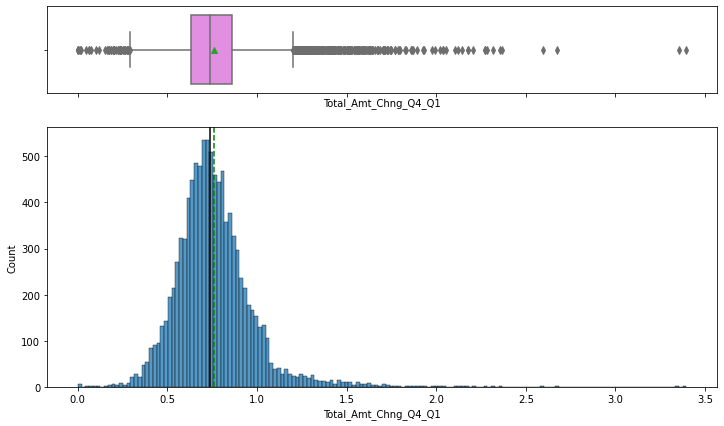

<IPython.core.display.Javascript object>

In [27]:
histogram_boxplot(df, "Total_Amt_Chng_Q4_Q1")

* The distribution of ratio of total amount change Q4 to Q1 is right-skewed.
* The boxplot shows that there are many outliers to the right as well as some to the left.
* From the boxplot, we can see that the third quartile (Q3) is rouhgly equal to .85 which means 75% of customers have a ratio of total amount spent in the 4th quarter to the 1st quarter of .85 or less with an average of roughly .6. This means the vast majority of the customers do more spending on their credit cards in Q1 compared to Q4. That being said, there are many outlier customers with a ratio of 1 or more who do more spending in Q4 compared to Q1. 

### Observations on Average Utilization Ratio

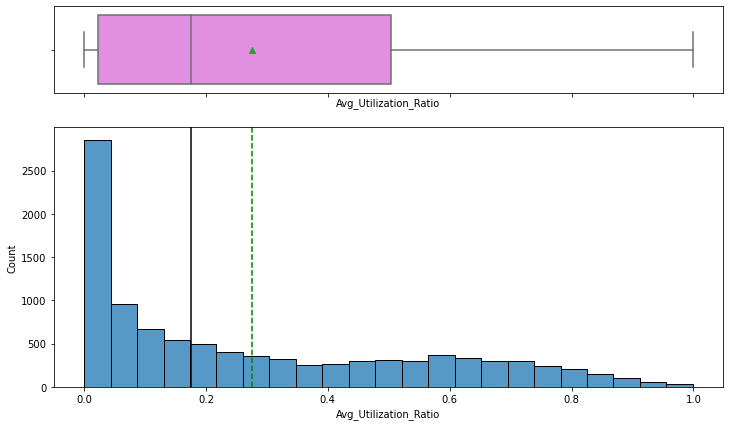

<IPython.core.display.Javascript object>

In [28]:
histogram_boxplot(df, "Avg_Utilization_Ratio")

* The distribution of ratio of average utilizatiion ratio is right-skewed.
* The boxplot shows that there are no outliers.
* From the boxplot, we can see that the third quartile (Q3) is rouhgly equal to .5 which means 75% of customers have a utilzaiton ratio of .5 or less with an average of roughly .3. This means the vast majority of the customers do not typically spend more than half their credit limit. 

Variables with a right skew include: credit limit, average open to buy, total amount change Q4 to Q1, and average utlization raito. The remaining variables have a relatively normal distribution.

In [29]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [30]:
cols = df.select_dtypes(include=["object"]).columns.tolist()
for col in cols:
    print(df[col].value_counts(dropna=False))

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
F    5358
M    4769
Name: Gender, dtype: int64
Graduate         4647
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
Married     5436
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


<IPython.core.display.Javascript object>

* There is erroneous data in the Income_category column with an "abc" bin that will need to be dealt with.

### Observations on Attrition Flag

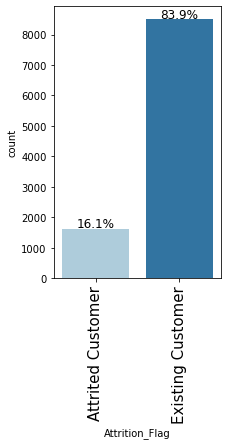

<IPython.core.display.Javascript object>

In [31]:
labeled_barplot(df, "Attrition_Flag", perc=True)

* The data is imbalanced. There are only ~16% of the customers in the data who left the bank's credit card services.

### Observations on Gender

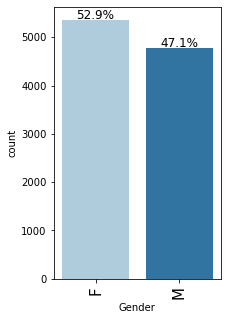

<IPython.core.display.Javascript object>

In [32]:
labeled_barplot(df, "Gender", perc=True)

* The data is almost perfectly split between female and male customers with females having a slight majority.

### Observations on Education Level

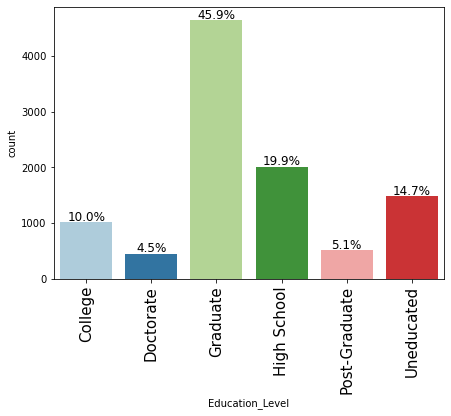

<IPython.core.display.Javascript object>

In [33]:
labeled_barplot(df, "Education_Level", perc=True)

* The most commmon education level category is "Graduate" with ~46% of the customers in the data having this education level followed by "High School" and then "Uneducated."

### Observations on Marital Status

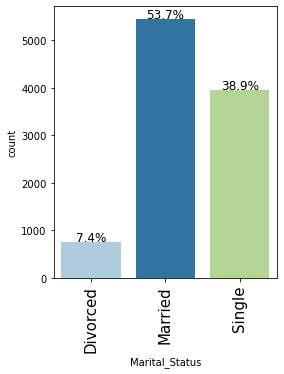

<IPython.core.display.Javascript object>

In [34]:
labeled_barplot(df, "Marital_Status", perc=True)

* The most of the customers in the data set are married at ~54% followed by "single" at ~39% and "divorced" a minority at ~7%.

### Observations on Income Category

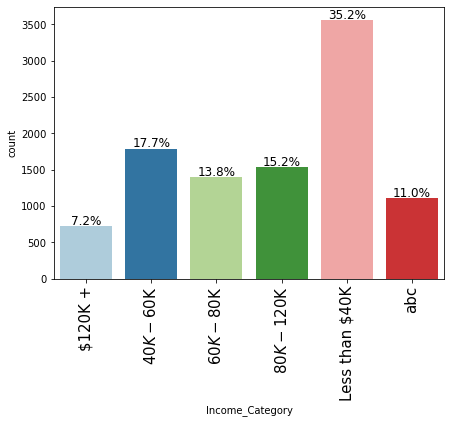

<IPython.core.display.Javascript object>

In [35]:
labeled_barplot(df, "Income_Category", perc=True)

In [36]:
7.2 + 17.7 + 13.8 + 15.2

53.900000000000006

<IPython.core.display.Javascript object>

* The category with the most customers in it are in the "Less than $40k" category.
* However, the majority of customers, over half of the customers in the data set have an income of over $40k.
* The erroneous category of "abc" will be imputed to the mode.

In [37]:
df['Income_Category'].loc[df['Income_Category'] == 'abc']= pd.Series(df['Income_Category'].loc[df['Income_Category'] == 'abc']).str.replace('abc', df['Income_Category'].mode()[0], regex=True)

<IPython.core.display.Javascript object>

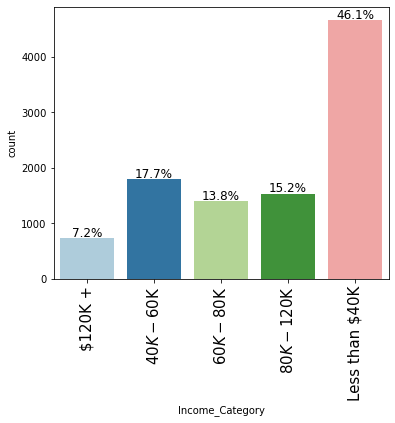

<IPython.core.display.Javascript object>

In [38]:
labeled_barplot(df, "Income_Category", perc=True)

* The 11% of the data that was erroneously 'abc' for income category has been added to the previously ~35% most common category of "Less than $40k."

### Observations on Card Category

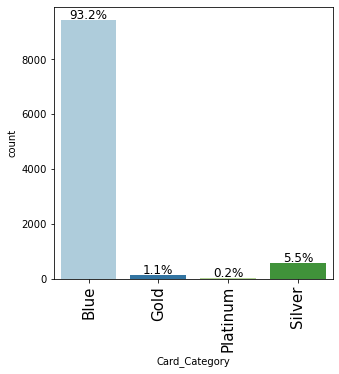

<IPython.core.display.Javascript object>

In [39]:
labeled_barplot(df, "Card_Category", perc=True)

* The vast majority of customers have a "Blue" card category.

### Bivariate Analysis

In [40]:
df["Attrition_Flag"] = df['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1}).astype(int)

<IPython.core.display.Javascript object>


The columns of Education_Level, Income_Category, and Card_Category need to be converted to categorical numerical values.

In [41]:
df['Education_Level'].replace({'Doctorate':5, 'Post-Graduate':4, 'Graduate':3, 'College':2, 'High School':1, 'Uneducated':0}, inplace=True) 
df['Income_Category'].replace({'$120K +':4, '$80K - $120K':3, '$60K - $80K':2, '$40K - $60K':1, 'Less than $40K':0}, inplace=True)
df['Card_Category'].replace({'Platinum':3, 'Gold':2, 'Silver':1, 'Blue':0}, inplace=True)


<IPython.core.display.Javascript object>

In [42]:
pd.Categorical(df['Education_Level'])
pd.Categorical(df['Income_Category'])
pd.Categorical(df['Card_Category'])

[0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 1]
Length: 10127
Categories (4, int64): [0, 1, 2, 3]

<IPython.core.display.Javascript object>

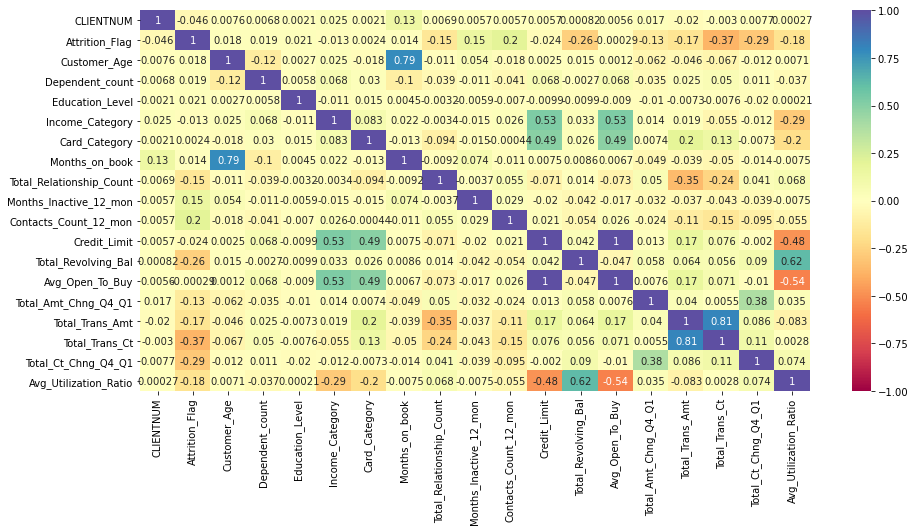

<IPython.core.display.Javascript object>

In [43]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap="Spectral")
plt.show()

**Observations for Model building:**
* Dependent variable attrition_flag shows a moderate correlation with 'Total_Trans_Ct' and Total_Ct_Chng_Q4_Q1. 
* Total_Trans_Amt is highly correlated with Total_Trans_Ct, one of these will be dropped.
* Income_Category is highly correlated with Card_Category, one of these will be dropped.
* Customer_Age is highly correlated with Months_on_book. 
* Avg_Utilization_Ratio has a moderate to high correlation with three other variables so it will be dropped.

**Observations for Customer Analysis:**
* Total Transaction count is negatively correlated with attrition, meaning, the less a customer uses the card, the more likely they are to leave their credit card.
* Also similarly negatively correlated with attrition include Total Revolving Balnce, Total Count Change Q4 to Q1, Average utilization ratio, and total transaction amount; all telling us what we've uncovered above: the less a customer uses the card, the more likely they are to leave their credit card.

* It looks like total_relationship_count is negatively correlated with attrition, meaning, the less a customer is contact, the more likely they are to attrite.
* Similarly, the more inactivty in the past 12 months on a customer's account, the more likely they are to leave their credit card.

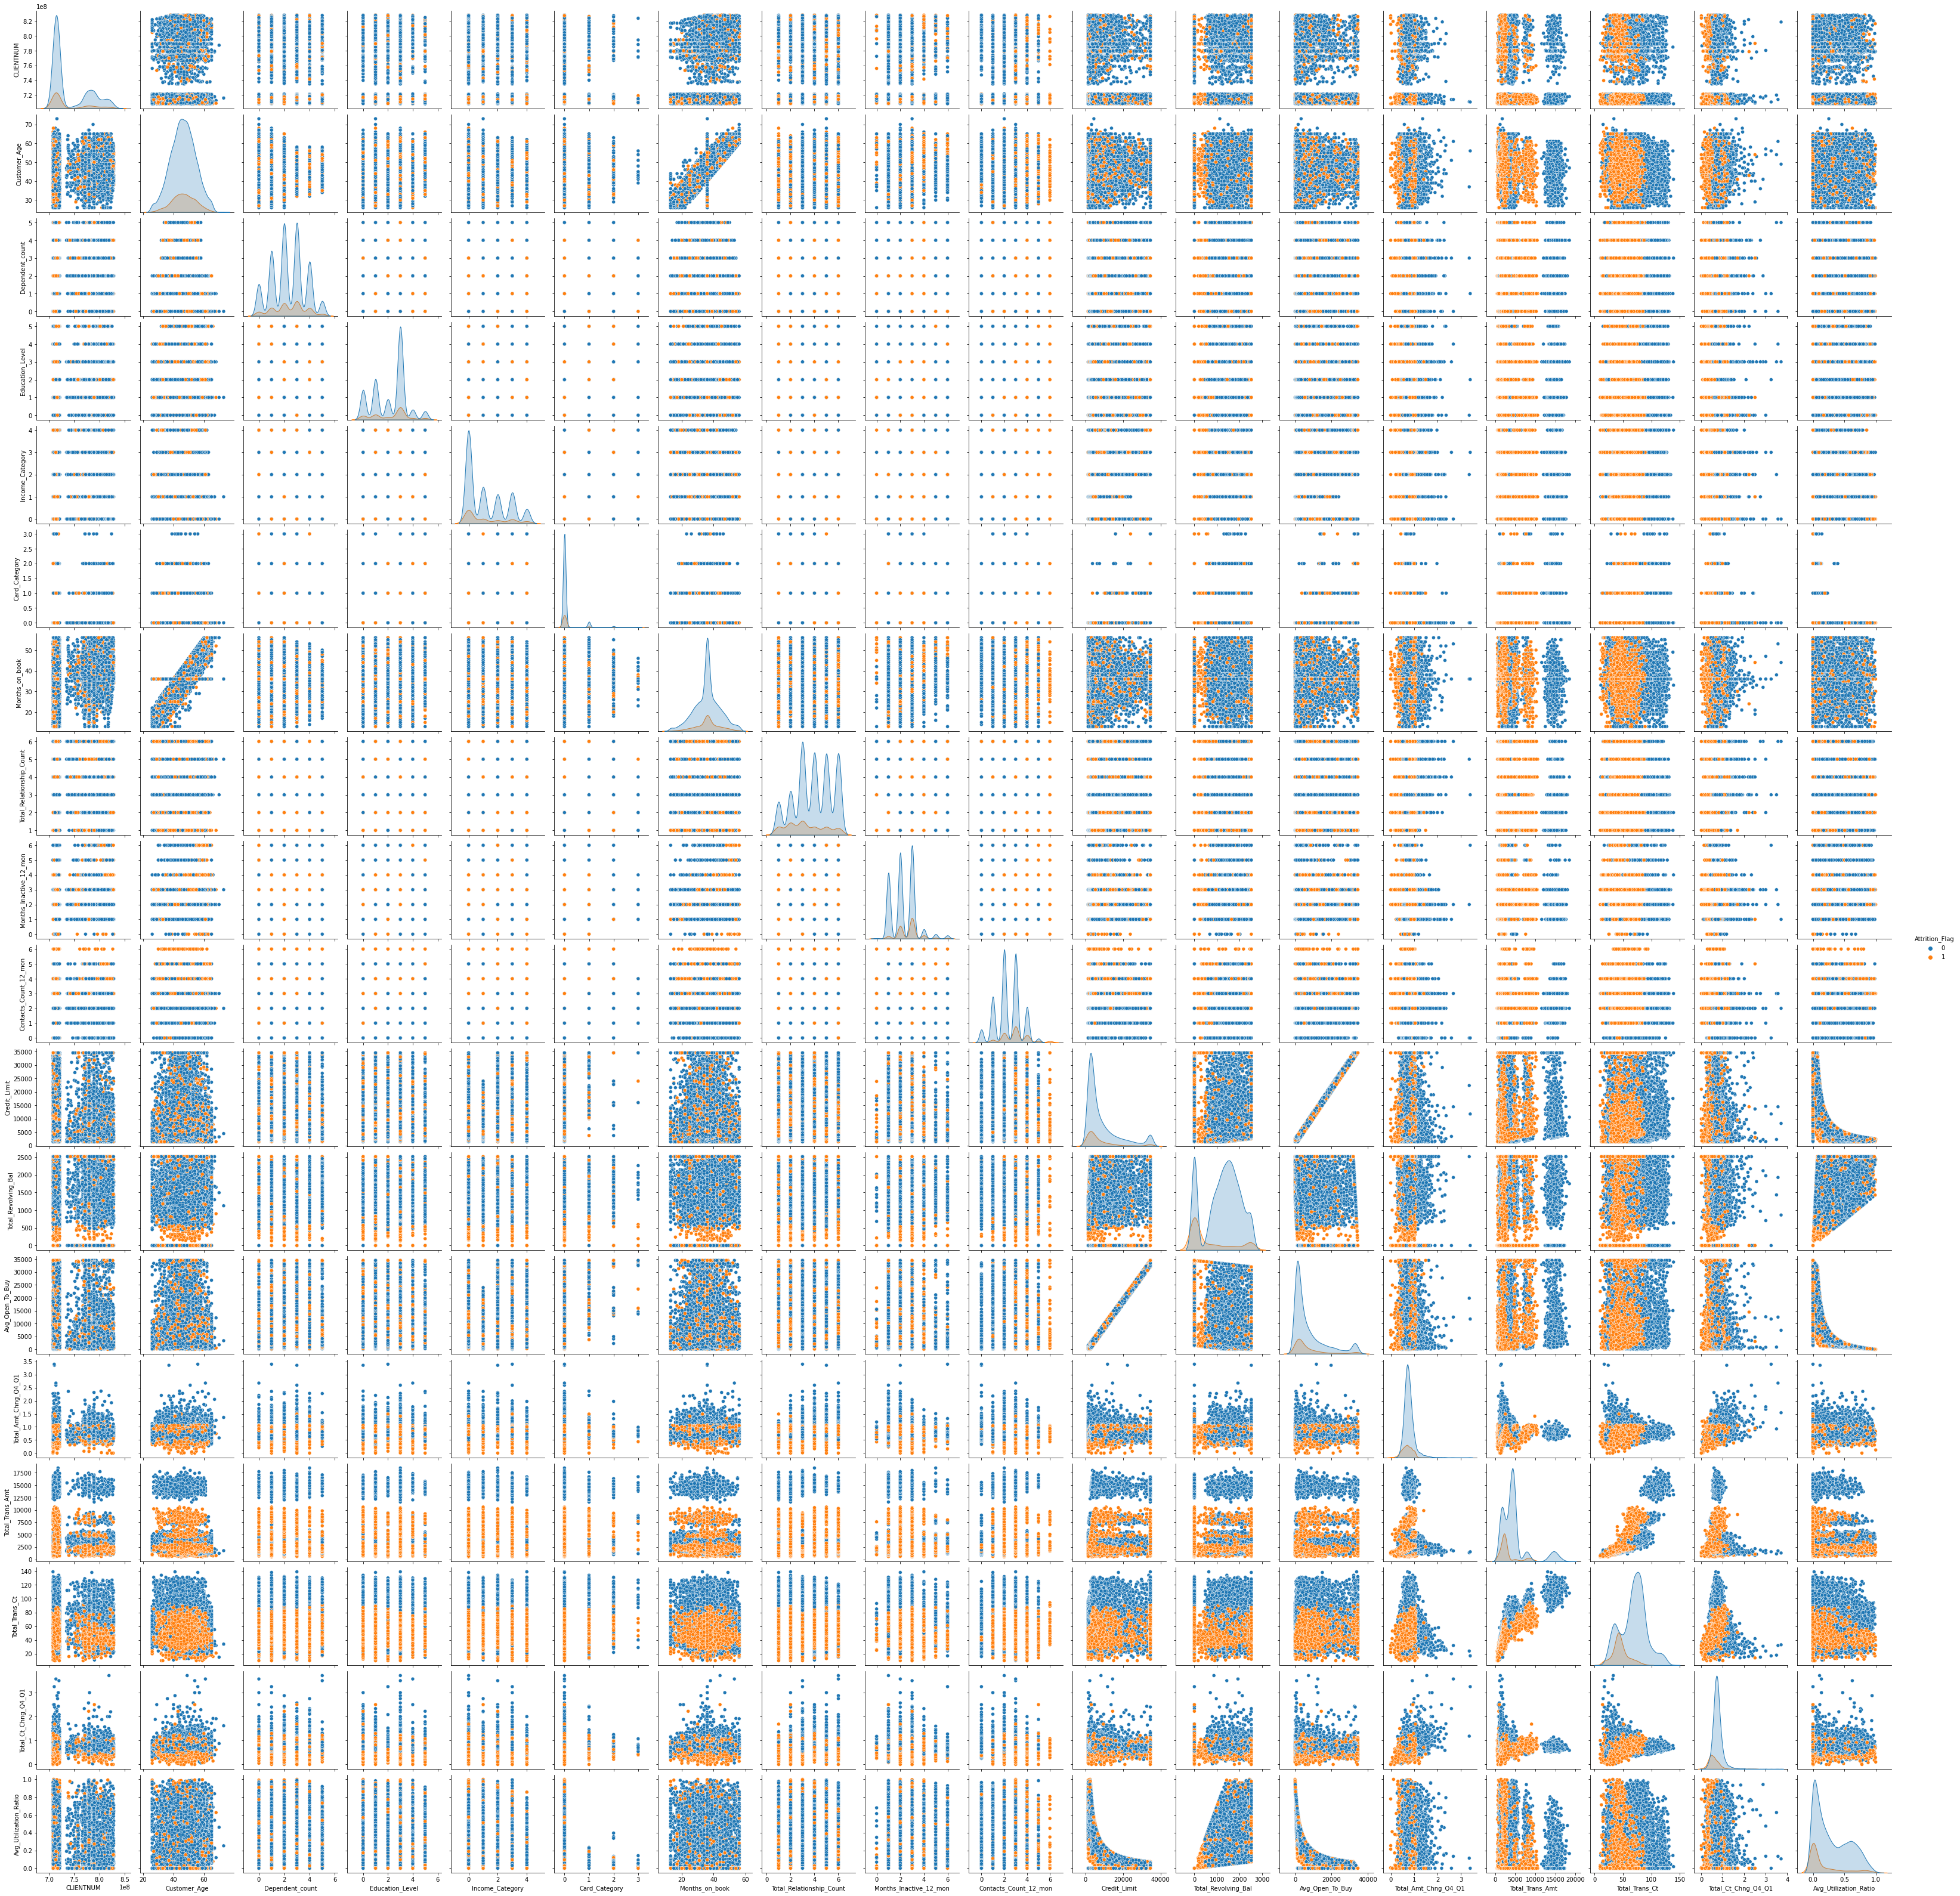

<IPython.core.display.Javascript object>

In [44]:
sns.pairplot(data=df,hue="Attrition_Flag")
plt.show()

* We can see that most customers that attrited seem to have less than 100 total transactions and less than $10,000 in total transaction amount. 
* However, there are overlapping distributions for attrited and non-attrited customers. The pair plot is also hard to read so these variables will be explored further.

In [45]:
### Function to plot boxplot
def boxplot(x):
    plt.figure(figsize=(10,7))
    sns.boxplot(data=data, x="Attrition_Flag",y=data[x],palette="PuBu")
    plt.show()

<IPython.core.display.Javascript object>

### Attrition Flag vs Months on Book

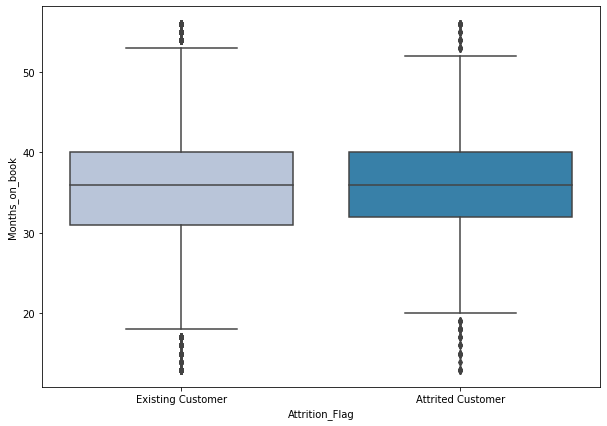

<IPython.core.display.Javascript object>

In [46]:
boxplot('Months_on_book')

* Time with the bank doesn't seem to effect too much whether a customer leaves the bank's credit card business line.

### Attrition Flag vs Dependent Count

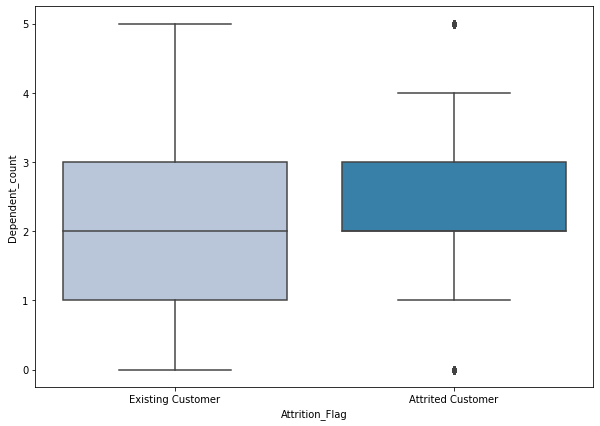

<IPython.core.display.Javascript object>

In [47]:
boxplot('Dependent_count')

* The customers that attrited, tend to have a similar dependent count compared with those that stay with the bank's credit card business.

### Attrition Flag vs Total Relationship Count

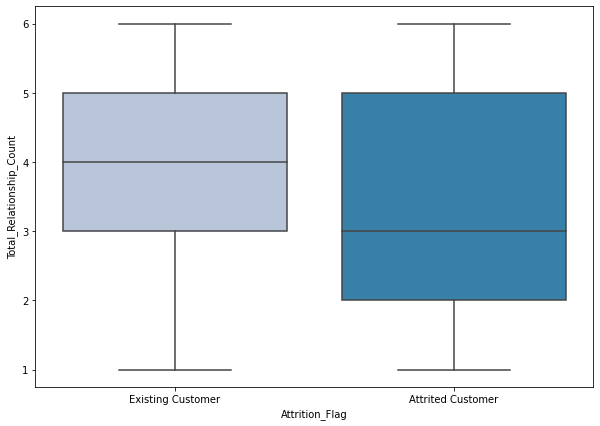

<IPython.core.display.Javascript object>

In [48]:
boxplot('Total_Relationship_Count')

* Customers who attrite, have less contracts with the bank.

### Attrition Flag vs Months Inactive (in the past 12 months)

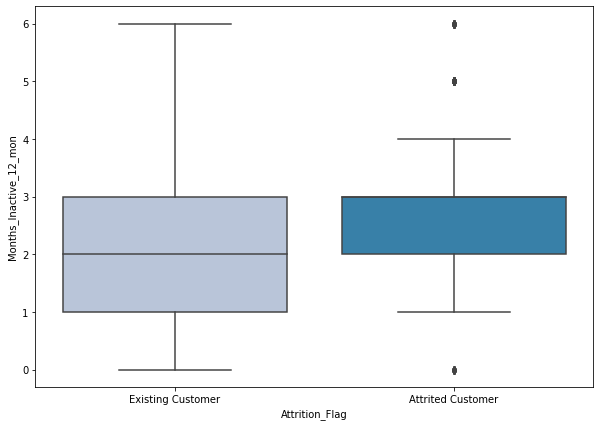

<IPython.core.display.Javascript object>

In [49]:
boxplot('Months_Inactive_12_mon')

* Customers who leave have a general smaller range of months of inactivity in a 12-month period with the vast majority of customers leaving having between 1 and 4 months of inacitivity with 75% of those cusotmers having 3 or less months of inactivity.

### Attrition Flag vs Contacts Count (in the past 12 months)

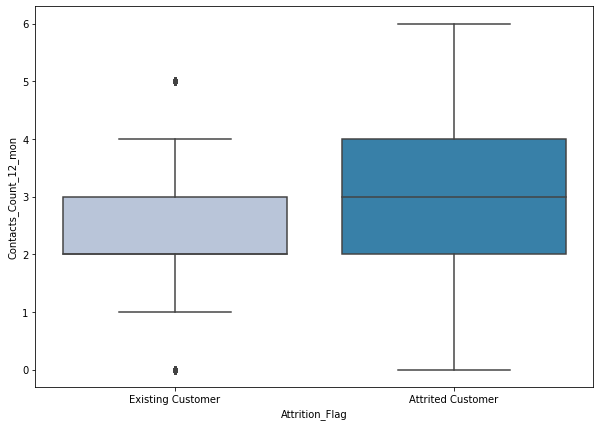

<IPython.core.display.Javascript object>

In [50]:
boxplot('Contacts_Count_12_mon')

* This is interesting; it appears that customers who leave are contacted more than those who stay with their credit card with the bank.

### Attrition Flag vs Credit Limit

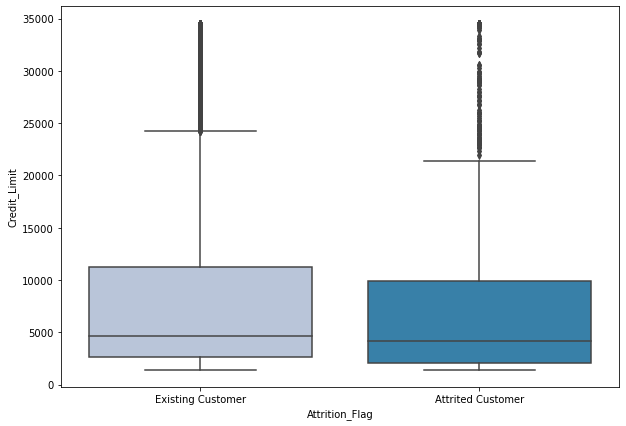

<IPython.core.display.Javascript object>

In [51]:
boxplot("Credit_Limit")

* Those who leave their credit card tend to have a lower credit limit. 

### Attrition Flag vs Total Revolving Balance

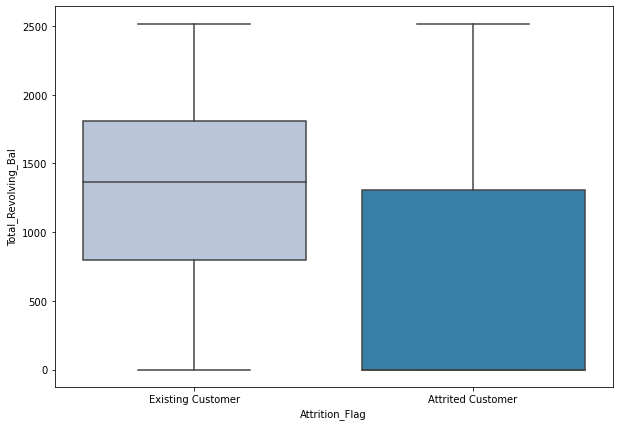

<IPython.core.display.Javascript object>

In [52]:
boxplot('Total_Revolving_Bal')

* Those that leave their credit card have a much less balance than those who stay; the seventy fifth percentile of the customers who left have a total revolving balance equal the average revolving balance of those that are still with the bank's credit card of roughly $1,400.

### Attrition Flag vs Average Open to Buy

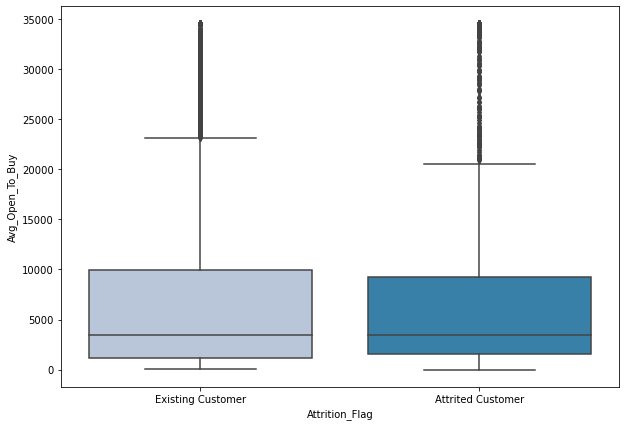

<IPython.core.display.Javascript object>

In [53]:
boxplot('Avg_Open_To_Buy')

* The average open to buy is relatively comprable between attrited and existing customers.

### Attrition Flag vs Total Amount Change Q4 to Q1

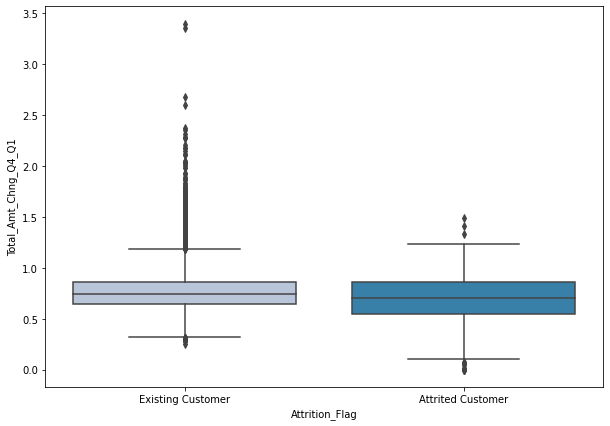

<IPython.core.display.Javascript object>

In [54]:
boxplot('Total_Amt_Chng_Q4_Q1')

* Those who leave their credit card tend to spend less in Q4 than those who stay with their credit card.

### Attrition Flag vs Total Transaction Amount

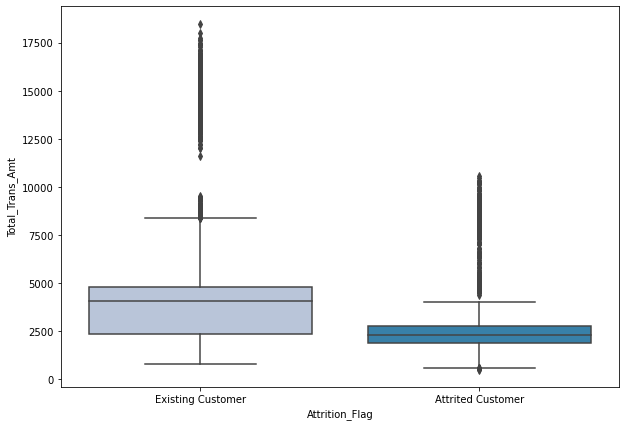

<IPython.core.display.Javascript object>

In [55]:
boxplot('Total_Trans_Amt')

* Attrited customers have less total dollars in transactions than those that do not attrite.

### Attrition Flag vs Total Transaction Count

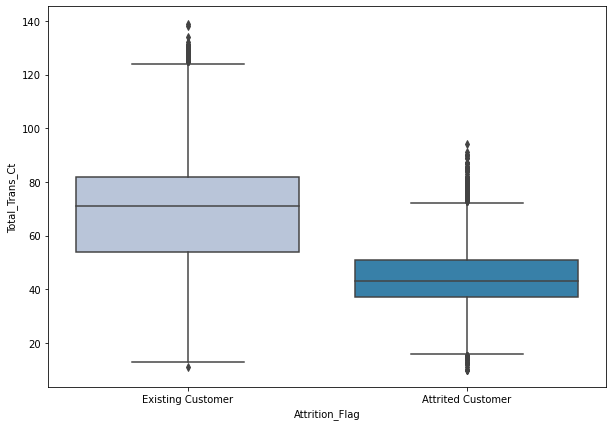

<IPython.core.display.Javascript object>

In [56]:
boxplot('Total_Trans_Ct')

* Attrited customers have less total transactions than those that do not attrite.

### Attrition Flag vs Total Count Chnage Q4 to Q1

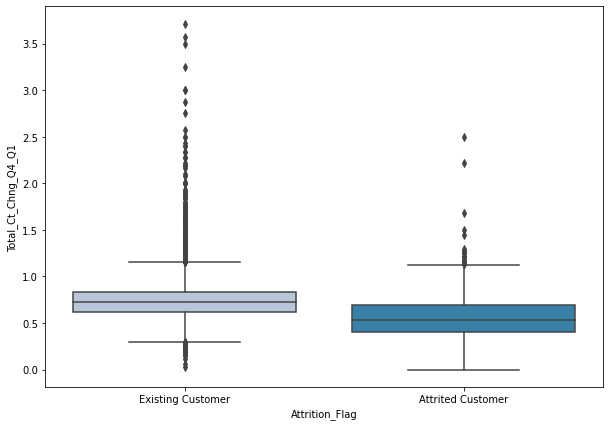

<IPython.core.display.Javascript object>

In [57]:
boxplot('Total_Ct_Chng_Q4_Q1')

* Those who leave their credit card tend to have less transactions in Q4 than those who stay with their credit card.

### Attrition Flag vs Average Utilization Ratio

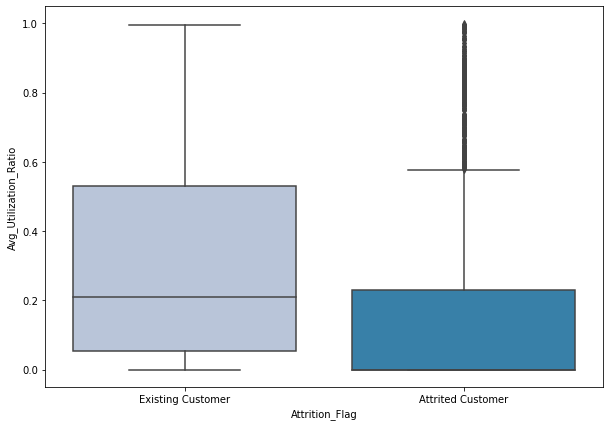

<IPython.core.display.Javascript object>

In [58]:
boxplot('Avg_Utilization_Ratio')

* Attrited customers have a much lower average utilization ratio than existing customers.

**Data Cleaning to do before Model Creation**

The string attribute columns of Gender and Marital_Status will need to be converted to dummy columns.


Variables/columns to drop:
* Total_Trans_Amt 
* Customer_Age
* Avg_Utilization_Ratio
* CLIENTNUM

Variables/columns to normalize:
* Credit_Limit
* Avg_Open_To_Buy
* Total_Amt_Chng_Q4_Q1

Dropping columns for our model.

In [59]:
df_new = df.copy()
df_new.drop(['Total_Trans_Amt','Customer_Age', 'Avg_Utilization_Ratio','CLIENTNUM'], axis=1, inplace=True) 

<IPython.core.display.Javascript object>

Z Transformation to Normalize Skewed Variables

In [60]:
cols_log = ['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1']


def z_transform(x):
    return (x - np.mean(x)) / np.std(x)

cols_zformed = []


for col in cols_log:
    df_new[f'{col}_z'] = z_transform(df[col])
    cols_zformed.append(f'{col}_z')


df_new.drop(cols_log, axis=1, inplace=True)
df_new.head()

    

Attrition_Flag Gender  Dependent_count  Education_Level Marital_Status  \
0               0      M                3                1        Married   
1               0      F                5                3         Single   
2               0      M                3                3        Married   
3               0      F                4                1        Married   
4               0      M                3                0        Married   

   Income_Category  Card_Category  Months_on_book  Total_Relationship_Count  \
0                2              0              39                         5   
1                0              0              44                         6   
2                3              0              36                         4   
3                0              0              34                         3   
4                2              0              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Total_Revolving_Bal  \
0                       1                      3                  777   
1                       1                      2                  864   
2                       1                      0                    0   
3                       4                      1                 2517   
4                       1                      0                    0   

   Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Credit_Limit_z  Avg_Open_To_Buy_z  \
0              42                 1.62            0.45               0.49   
1              33                 3.71           -0.04              -0.01   
2              20                 2.33           -0.57              -0.45   
3              20                 2.33           -0.59              -0.73   
4              28                 2.50           -0.43              -0.30   

   Total_Amt_Chng_Q4_Q1_z  
0                    2.62  
1                    3.56  
2                    8.37  
3                    2.94  
4                    6.46

<IPython.core.display.Javascript object>

Creating Dummy variables

In [61]:
dum_cols = ['Gender','Marital_Status']

df_new = pd.get_dummies(
    df_new,
    columns=dum_cols,
    drop_first=True,
)

df_new.head()

Attrition_Flag  Dependent_count  Education_Level  Income_Category  \
0               0                3                1                2   
1               0                5                3                0   
2               0                3                3                3   
3               0                4                1                0   
4               0                3                0                2   

   Card_Category  Months_on_book  Total_Relationship_Count  \
0              0              39                         5   
1              0              44                         6   
2              0              36                         4   
3              0              34                         3   
4              0              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Total_Revolving_Bal  \
0                       1                      3                  777   
1                       1                      2                  864   
2                       1                      0                    0   
3                       4                      1                 2517   
4                       1                      0                    0   

   Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Credit_Limit_z  Avg_Open_To_Buy_z  \
0              42                 1.62            0.45               0.49   
1              33                 3.71           -0.04              -0.01   
2              20                 2.33           -0.57              -0.45   
3              20                 2.33           -0.59              -0.73   
4              28                 2.50           -0.43              -0.30   

   Total_Amt_Chng_Q4_Q1_z  Gender_M  Marital_Status_Married  \
0                    2.62         1                       1   
1                    3.56         0                       0   
2                    8.37         1                       1   
3                    2.94         0                       1   
4                    6.46         1                       1   

   Marital_Status_Single  
0                      0  
1                      1  
2                      0  
3                      0  
4                      0

<IPython.core.display.Javascript object>

In [62]:
print(f'After preparing our data for modeling, it has {df_new.shape[0]:,.0f} rows and {df_new.shape[1]} columns.')

After preparing our data for modeling, it has 10,127 rows and 18 columns.


<IPython.core.display.Javascript object>

In [63]:
X = df_new.drop(["Attrition_Flag"], axis=1)
y = df_new["Attrition_Flag"]

<IPython.core.display.Javascript object>

In [64]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, temporary and test


X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 17) (2026, 17) (2026, 17)


<IPython.core.display.Javascript object>

In [65]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6075
Number of rows in validation data = 2026
Number of rows in test data = 2026


<IPython.core.display.Javascript object>

In [66]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0   0.84
1   0.16
Name: Attrition_Flag, dtype: float64
Percentage of classes in validation set:
0   0.84
1   0.16
Name: Attrition_Flag, dtype: float64
Percentage of classes in test set:
0   0.84
1   0.16
Name: Attrition_Flag, dtype: float64


<IPython.core.display.Javascript object>

In [67]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [68]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Model Building

Bagging Classifier Model

Training performance:
    Accuracy  Recall  Precision   F1
0      0.99    0.96       0.99 0.98
Validation performance:
    Accuracy  Recall  Precision   F1
0      0.92    0.66       0.81 0.73


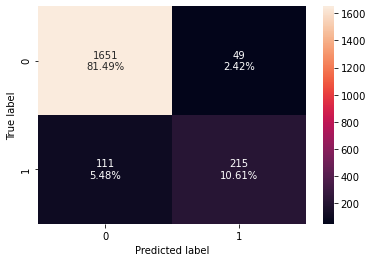

<IPython.core.display.Javascript object>

In [72]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print("Training performance:\n",bagging_classifier_model_train_perf)
bagging_classifier_model_val_perf=model_performance_classification_sklearn(bagging_classifier,X_val,y_val)
print("Validation performance:\n",bagging_classifier_model_val_perf)
#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier, X_val, y_val)

Random Forest Model

Training performance:
    Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00
Validation performance:
    Accuracy  Recall  Precision   F1
0      0.93    0.69       0.85 0.76


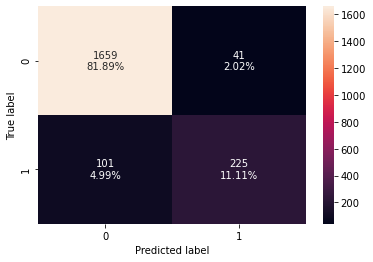

<IPython.core.display.Javascript object>

In [74]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)


#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_val_perf=model_performance_classification_sklearn(rf_estimator,X_val,y_val)
print("Validation performance:\n",rf_estimator_model_val_perf)
#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator, X_val, y_val)

Decision Tree Model

Training performance:
    Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00
Validation performance:
    Accuracy  Recall  Precision   F1
0      0.89    0.64       0.68 0.66


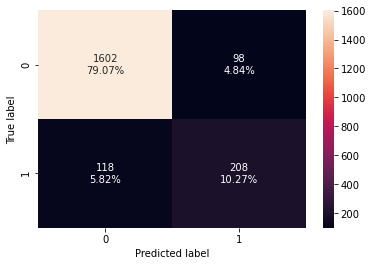

<IPython.core.display.Javascript object>

In [75]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)


#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_val_perf=model_performance_classification_sklearn(d_tree,X_val,y_val)
print("Validation performance:\n",d_tree_model_val_perf)
#Creating confusion matrix
confusion_matrix_sklearn(d_tree, X_val, y_val)

Adaboost Classifier Model

   Accuracy  Recall  Precision   F1
0      0.93    0.71       0.81 0.76
   Accuracy  Recall  Precision   F1
0      0.93    0.72       0.81 0.77


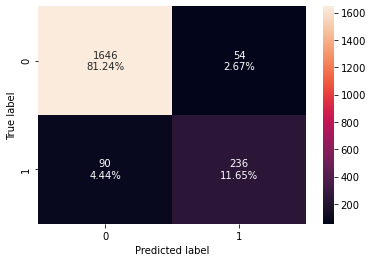

<IPython.core.display.Javascript object>

In [76]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_val_perf=model_performance_classification_sklearn(ab_classifier,X_val,y_val)
print(ab_classifier_model_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_val,y_val)

Gradient Boosting Classifier Model

   Accuracy  Recall  Precision   F1
0      0.94    0.73       0.90 0.81
   Accuracy  Recall  Precision   F1
0      0.94    0.73       0.85 0.78


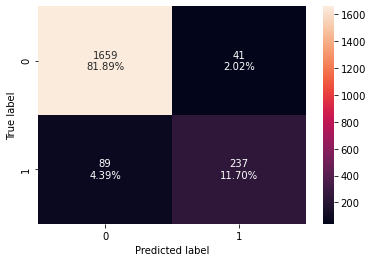

<IPython.core.display.Javascript object>

In [77]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print(gb_classifier_model_train_perf)
gb_classifier_model_val_perf=model_performance_classification_sklearn(gb_classifier,X_val,y_val)
print(gb_classifier_model_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_val,y_val)

XGBoost Classifier Model

[19:58:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
   Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00
   Accuracy  Recall  Precision   F1
0      0.94    0.76       0.86 0.81


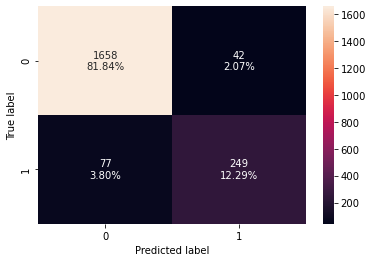

<IPython.core.display.Javascript object>

In [78]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1)
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print(xgb_classifier_model_train_perf)
xgb_classifier_model_val_perf=model_performance_classification_sklearn(xgb_classifier,X_val,y_val)
print(xgb_classifier_model_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_val,y_val)

### Building the Models using Oversampled Data

In [79]:
print("Before OverSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label 'Yes': 976
Before OverSampling, counts of label 'No': 5099 

After OverSampling, counts of label 'Yes': 5099
After OverSampling, counts of label 'No': 5099 

After OverSampling, the shape of train_X: (10198, 17)
After OverSampling, the shape of train_y: (10198,) 



<IPython.core.display.Javascript object>

Bagging Classifier Model With Oversampled Data

Training performance:
    Accuracy  Recall  Precision   F1
0      0.90    0.81       1.00 0.89
Validation performance:
    Accuracy  Recall  Precision   F1
0      0.92    0.66       0.81 0.73


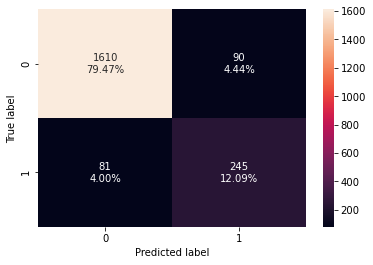

<IPython.core.display.Javascript object>

In [81]:
#Fitting the model
bagging_classifier_over = BaggingClassifier(random_state=1)
bagging_classifier_over.fit(X_train_over,y_train_over)

#Calculating different metrics
bagging_classifier_over_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train_over,y_train_over)
print("Training performance:\n",bagging_classifier_over_model_train_perf)
bagging_classifier_over_model_val_perf=model_performance_classification_sklearn(bagging_classifier,X_val,y_val)
print("Validation performance:\n",bagging_classifier_over_model_val_perf)
#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier_over, X_val, y_val)

Random Forest Model With Oversampled Data

Training performance:
    Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00
Validation performance:
    Accuracy  Recall  Precision   F1
0      0.92    0.78       0.75 0.76


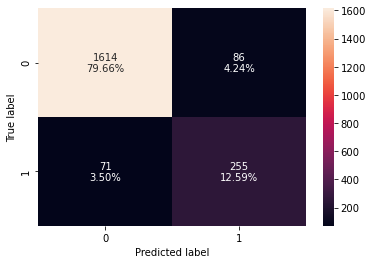

<IPython.core.display.Javascript object>

In [90]:
#Fitting the model
rf_estimator_over = RandomForestClassifier(random_state=1)
rf_estimator_over.fit(X_train_over,y_train_over)


#Calculating different metrics
rf_estimator_over_model_train_perf=model_performance_classification_sklearn(rf_estimator_over,X_train_over,y_train_over)
print("Training performance:\n",rf_estimator_over_model_train_perf)
rf_estimator_over_model_val_perf=model_performance_classification_sklearn(rf_estimator_over,X_val,y_val)
print("Validation performance:\n",rf_estimator_over_model_val_perf)
#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator_over, X_val, y_val)

Decision Tree Model With Oversampled Data

Training performance:
    Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00
Validation performance:
    Accuracy  Recall  Precision   F1
0      0.87    0.72       0.58 0.64


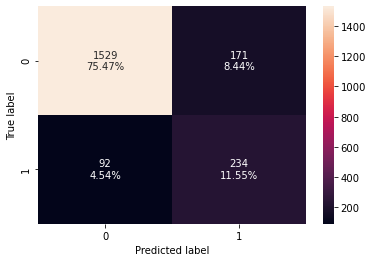

<IPython.core.display.Javascript object>

In [83]:
#Fitting the model
d_tree_over = DecisionTreeClassifier(random_state=1)
d_tree_over.fit(X_train_over,y_train_over)


#Calculating different metrics
d_tree_over_model_train_perf=model_performance_classification_sklearn(d_tree_over,X_train_over,y_train_over)
print("Training performance:\n",d_tree_over_model_train_perf)
d_tree_over_model_val_perf=model_performance_classification_sklearn(d_tree_over,X_val,y_val)
print("Validation performance:\n",d_tree_over_model_val_perf)
#Creating confusion matrix
confusion_matrix_sklearn(d_tree_over, X_val, y_val)

Adaboost Classifier Model Using Oversampled Data

   Accuracy  Recall  Precision   F1
0      0.91    0.92       0.91 0.91
   Accuracy  Recall  Precision   F1
0      0.89    0.83       0.61 0.70


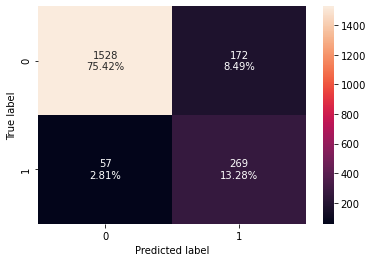

<IPython.core.display.Javascript object>

In [84]:
#Fitting the model
ab_classifier_over = AdaBoostClassifier(random_state=1)
ab_classifier_over.fit(X_train_over,y_train_over)

#Calculating different metrics
ab_classifier_over_model_train_perf=model_performance_classification_sklearn(ab_classifier_over,X_train_over,y_train_over)
print(ab_classifier_over_model_train_perf)
ab_classifier_over_model_val_perf=model_performance_classification_sklearn(ab_classifier_over,X_val,y_val)
print(ab_classifier_over_model_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier_over,X_val,y_val)

Gradient Boosting Classifier Model Using Oversampled Data

   Accuracy  Recall  Precision   F1
0      0.94    0.94       0.94 0.94
   Accuracy  Recall  Precision   F1
0      0.92    0.83       0.73 0.78


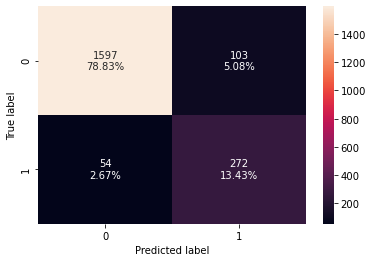

<IPython.core.display.Javascript object>

In [85]:
#Fitting the model
gb_classifier_over = GradientBoostingClassifier(random_state=1)
gb_classifier_over.fit(X_train_over,y_train_over)

#Calculating different metrics
gb_classifier_over_model_train_perf=model_performance_classification_sklearn(gb_classifier_over,X_train_over,y_train_over)
print(gb_classifier_over_model_train_perf)
gb_classifier_over_model_val_perf=model_performance_classification_sklearn(gb_classifier_over,X_val,y_val)
print(gb_classifier_over_model_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier_over,X_val,y_val)

XGBoost Classifier Model Using Oversampled Data

[20:37:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
   Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00
   Accuracy  Recall  Precision   F1
0      0.93    0.81       0.75 0.78


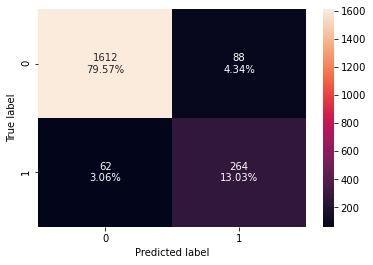

<IPython.core.display.Javascript object>

In [86]:
#Fitting the model
xgb_classifier_over = XGBClassifier(random_state=1)
xgb_classifier_over.fit(X_train_over,y_train_over)

#Calculating different metrics
xgb_classifier_over_model_train_perf=model_performance_classification_sklearn(xgb_classifier_over,X_train_over,y_train_over)
print(xgb_classifier_over_model_train_perf)
xgb_classifier_over_model_val_perf=model_performance_classification_sklearn(xgb_classifier_over,X_val,y_val)
print(xgb_classifier_over_model_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier_over,X_val,y_val)

### Building the Models using Undersampled Data

In [87]:
# fit random under sampler on the train data
rus = RandomUnderSampler(random_state=1, sampling_strategy = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [88]:
print("Before Under Sampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before Under Sampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, count of label '1': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, count of label '0': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, count of label '1': 976
Before Under Sampling, count of label '0': 5099 

After Under Sampling, count of label '1': 976
After Under Sampling, count of label '0': 976 

After Under Sampling, the shape of train_X: (1952, 17)
After Under Sampling, the shape of train_y: (1952,) 



<IPython.core.display.Javascript object>

Bagging Classifier Model With Undersampled Data

Training performance:
    Accuracy  Recall  Precision   F1
0      0.99    0.98       1.00 0.99
Validation performance:
    Accuracy  Recall  Precision   F1
0      0.89    0.84       0.60 0.70


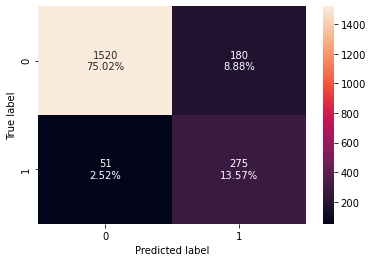

<IPython.core.display.Javascript object>

In [89]:
#Fitting the model
bagging_classifier_un = BaggingClassifier(random_state=1)
bagging_classifier_un.fit(X_train_un,y_train_un)

#Calculating different metrics
bagging_classifier_un_model_train_perf=model_performance_classification_sklearn(bagging_classifier_un,X_train_un,y_train_un)
print("Training performance:\n",bagging_classifier_un_model_train_perf)
bagging_classifier_un_model_val_perf=model_performance_classification_sklearn(bagging_classifier_un,X_val,y_val)
print("Validation performance:\n",bagging_classifier_un_model_val_perf)
#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier_un, X_val, y_val)

Random Forest Model With Undersampled Data

Training performance:
    Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00
Validation performance:
    Accuracy  Recall  Precision   F1
0      0.89    0.88       0.61 0.72


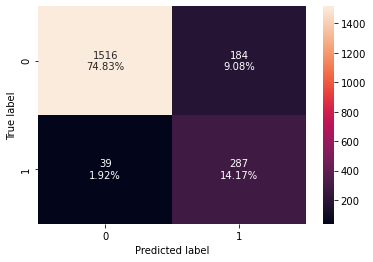

<IPython.core.display.Javascript object>

In [91]:
#Fitting the model
rf_estimator_un = RandomForestClassifier(random_state=1)
rf_estimator_un.fit(X_train_un,y_train_un)


#Calculating different metrics
rf_estimator_un_model_train_perf=model_performance_classification_sklearn(rf_estimator_un,X_train_un,y_train_un)
print("Training performance:\n",rf_estimator_un_model_train_perf)
rf_estimator_un_model_val_perf=model_performance_classification_sklearn(rf_estimator_un,X_val,y_val)
print("Validation performance:\n",rf_estimator_un_model_val_perf)
#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator_un, X_val, y_val)

Decision Tree Model With Undersampled Data

Training performance:
    Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00
Validation performance:
    Accuracy  Recall  Precision   F1
0      0.83    0.82       0.49 0.61


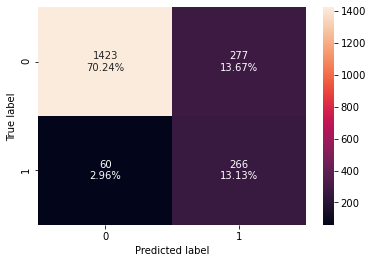

<IPython.core.display.Javascript object>

In [92]:
#Fitting the model
d_tree_un = DecisionTreeClassifier(random_state=1)
d_tree_un.fit(X_train_un,y_train_un)


#Calculating different metrics
d_tree_un_model_train_perf=model_performance_classification_sklearn(d_tree_un,X_train_un,y_train_un)
print("Training performance:\n",d_tree_un_model_train_perf)
d_tree_un_model_val_perf=model_performance_classification_sklearn(d_tree_un,X_val,y_val)
print("Validation performance:\n",d_tree_un_model_val_perf)
#Creating confusion matrix
confusion_matrix_sklearn(d_tree_un, X_val, y_val)

Adaboost Classifier Model Using Undersampled Data

   Accuracy  Recall  Precision   F1
0      0.89    0.90       0.89 0.89
   Accuracy  Recall  Precision   F1
0      0.87    0.88       0.57 0.69


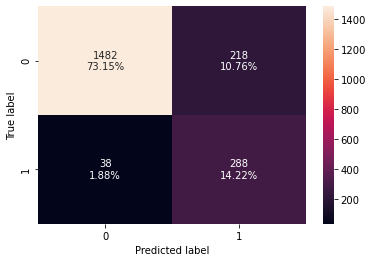

<IPython.core.display.Javascript object>

In [93]:
#Fitting the model
ab_classifier_un = AdaBoostClassifier(random_state=1)
ab_classifier_un.fit(X_train_un,y_train_un)

#Calculating different metrics
ab_classifier_un_model_train_perf=model_performance_classification_sklearn(ab_classifier_un,X_train_un,y_train_un)
print(ab_classifier_un_model_train_perf)
ab_classifier_un_model_val_perf=model_performance_classification_sklearn(ab_classifier_un,X_val,y_val)
print(ab_classifier_un_model_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier_un,X_val,y_val)

Gradient Boosting Classifier Model Using Undersampled Data

   Accuracy  Recall  Precision   F1
0      0.94    0.94       0.93 0.94
   Accuracy  Recall  Precision   F1
0      0.90    0.89       0.63 0.74


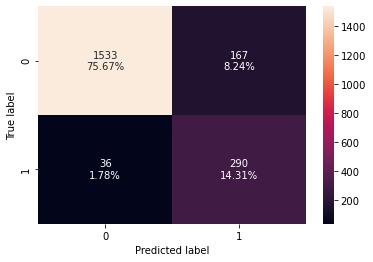

<IPython.core.display.Javascript object>

In [94]:
#Fitting the model
gb_classifier_un = GradientBoostingClassifier(random_state=1)
gb_classifier_un.fit(X_train_un,y_train_un)

#Calculating different metrics
gb_classifier_un_model_train_perf=model_performance_classification_sklearn(gb_classifier_un,X_train_un,y_train_un)
print(gb_classifier_un_model_train_perf)
gb_classifier_un_model_val_perf=model_performance_classification_sklearn(gb_classifier_un,X_val,y_val)
print(gb_classifier_un_model_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier_un,X_val,y_val)

XGBoost Classifier Model Using Undersampled Data

[20:59:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
   Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00
   Accuracy  Recall  Precision   F1
0      0.90    0.90       0.63 0.74


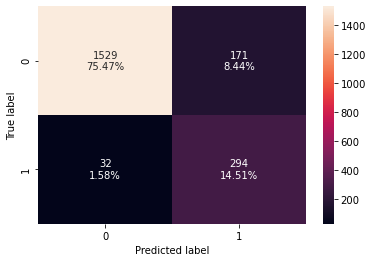

<IPython.core.display.Javascript object>

In [95]:
#Fitting the model
xgb_classifier_un = XGBClassifier(random_state=1)
xgb_classifier_un.fit(X_train_un,y_train_un)

#Calculating different metrics
xgb_classifier_un_model_train_perf=model_performance_classification_sklearn(xgb_classifier_un,X_train_un,y_train_un)
print(xgb_classifier_un_model_train_perf)
xgb_classifier_un_model_val_perf=model_performance_classification_sklearn(xgb_classifier_un,X_val,y_val)
print(xgb_classifier_un_model_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier_un,X_val,y_val)

### Summary of Model Performances

In [96]:
# training performance comparison

models_train_comp_df = pd.concat(
    [bagging_classifier_model_train_perf.T,bagging_classifier_over_model_train_perf.T,bagging_classifier_un_model_train_perf.T,
    rf_estimator_model_train_perf.T,rf_estimator_over_model_train_perf.T,rf_estimator_un_model_train_perf.T,
    d_tree_model_train_perf.T,d_tree_over_model_train_perf.T,d_tree_un_model_train_perf.T,
    ab_classifier_model_train_perf.T,ab_classifier_over_model_train_perf.T,ab_classifier_un_model_train_perf.T,
    gb_classifier_model_train_perf.T,gb_classifier_over_model_train_perf.T,gb_classifier_un_model_train_perf.T,
    xgb_classifier_model_train_perf.T,xgb_classifier_over_model_train_perf.T,xgb_classifier_un_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Bagging Classifier",
    "Bagging Classifier Up Data",
    "Bagging Classifier Down Data",
    "Random Forest Estimator",
    "Random Forest Estimator Up Data",
    "Random Forest Estimator Down Data",
    "Decision Tree",
    "Decision Tree Up Data",
    "Decision Tree Down Data",
    "Adaboost Classifier",
    "Adaboost Classifier Up Data",
    "Adaboost Classifier Down Data",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Up Data",
    "Gradient Boost Classifier Down Data",
    "XGBoost Classifier",
    "XGBoost Classifier Up Data",
    "XGBoost Classifier Down Data",
    ]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Bagging Classifier  Bagging Classifier Up Data  \
Accuracy                 0.99                        0.90   
Recall                   0.96                        0.81   
Precision                0.99                        1.00   
F1                       0.98                        0.89   

           Bagging Classifier Down Data  Random Forest Estimator  \
Accuracy                           0.99                     1.00   
Recall                             0.98                     1.00   
Precision                          1.00                     1.00   
F1                                 0.99                     1.00   

           Random Forest Estimator Up Data  Random Forest Estimator Down Data  \
Accuracy                              1.00                               1.00   
Recall                                1.00                               1.00   
Precision                             1.00                               1.00   
F1                                    1.00                               1.00   

           Decision Tree  Decision Tree Up Data  Decision Tree Down Data  \
Accuracy            1.00                   1.00                     1.00   
Recall              1.00                   1.00                     1.00   
Precision           1.00                   1.00                     1.00   
F1                  1.00                   1.00                     1.00   

           Adaboost Classifier  Adaboost Classifier Up Data  \
Accuracy                  0.93                         0.91   
Recall                    0.71                         0.92   
Precision                 0.81                         0.91   
F1                        0.76                         0.91   

           Adaboost Classifier Down Data  Gradient Boost Classifier  \
Accuracy                            0.89                       0.94   
Recall                              0.90                       0.73   
Precision                           0.89                       0.90   
F1                                  0.89                       0.81   

           Gradient Boost Classifier Up Data  \
Accuracy                                0.94   
Recall                                  0.94   
Precision                               0.94   
F1                                      0.94   

           Gradient Boost Classifier Down Data  XGBoost Classifier  \
Accuracy                                  0.94                1.00   
Recall                                    0.94                1.00   
Precision                                 0.93                1.00   
F1                                        0.94                1.00   

           XGBoost Classifier Up Data  XGBoost Classifier Down Data  
Accuracy                         1.00                          1.00  
Recall                           1.00                          1.00  
Precision                        1.00                          1.00  
F1                               1.00                          1.00

<IPython.core.display.Javascript object>

In [97]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [bagging_classifier_model_val_perf.T,bagging_classifier_over_model_val_perf.T,bagging_classifier_un_model_val_perf.T,
    rf_estimator_model_val_perf.T,rf_estimator_over_model_val_perf.T,rf_estimator_un_model_val_perf.T,
    d_tree_model_val_perf.T,d_tree_over_model_val_perf.T,d_tree_un_model_val_perf.T,
    ab_classifier_model_val_perf.T,ab_classifier_over_model_val_perf.T,ab_classifier_un_model_val_perf.T,
    gb_classifier_model_val_perf.T,gb_classifier_over_model_val_perf.T,gb_classifier_un_model_val_perf.T,
    xgb_classifier_model_val_perf.T,xgb_classifier_over_model_val_perf.T,xgb_classifier_un_model_val_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Bagging Classifier",
    "Bagging Classifier Up Data",
    "Bagging Classifier Down Data",
    "Random Forest Estimator",
    "Random Forest Estimator Up Data",
    "Random Forest Estimator Down Data",
    "Decision Tree",
    "Decision Tree Up Data",
    "Decision Tree Down Data",
    "Adaboost Classifier",
    "Adaboost Classifier Up Data",
    "Adaboost Classifier Down Data",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Up Data",
    "Gradient Boost Classifier Down Data",
    "XGBoost Classifier",
    "XGBoost Classifier Up Data",
    "XGBoost Classifier Down Data",
    ]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Bagging Classifier  Bagging Classifier Up Data  \
Accuracy                 0.92                        0.92   
Recall                   0.66                        0.66   
Precision                0.81                        0.81   
F1                       0.73                        0.73   

           Bagging Classifier Down Data  Random Forest Estimator  \
Accuracy                           0.89                     0.93   
Recall                             0.84                     0.69   
Precision                          0.60                     0.85   
F1                                 0.70                     0.76   

           Random Forest Estimator Up Data  Random Forest Estimator Down Data  \
Accuracy                              0.92                               0.89   
Recall                                0.78                               0.88   
Precision                             0.75                               0.61   
F1                                    0.76                               0.72   

           Decision Tree  Decision Tree Up Data  Decision Tree Down Data  \
Accuracy            0.89                   0.87                     0.83   
Recall              0.64                   0.72                     0.82   
Precision           0.68                   0.58                     0.49   
F1                  0.66                   0.64                     0.61   

           Adaboost Classifier  Adaboost Classifier Up Data  \
Accuracy                  0.93                         0.89   
Recall                    0.72                         0.83   
Precision                 0.81                         0.61   
F1                        0.77                         0.70   

           Adaboost Classifier Down Data  Gradient Boost Classifier  \
Accuracy                            0.87                       0.94   
Recall                              0.88                       0.73   
Precision                           0.57                       0.85   
F1                                  0.69                       0.78   

           Gradient Boost Classifier Up Data  \
Accuracy                                0.92   
Recall                                  0.83   
Precision                               0.73   
F1                                      0.78   

           Gradient Boost Classifier Down Data  XGBoost Classifier  \
Accuracy                                  0.90                0.94   
Recall                                    0.89                0.76   
Precision                                 0.63                0.86   
F1                                        0.74                0.81   

           XGBoost Classifier Up Data  XGBoost Classifier Down Data  
Accuracy                         0.93                          0.90  
Recall                           0.81                          0.90  
Precision                        0.75                          0.63  
F1                               0.78                          0.74

<IPython.core.display.Javascript object>

Three models that would probably benefit the most from tuning include:
* Bagging Classifier
* Random Forest Estimator
* Decision Tree with Downsampled Data

These models all have decent performance, with good scores for some metrics and not so great scores for other metrics. These models are all slightly overfit. We will tune these models.

The three best models with the best test performance are:
* XGBoost Classifier
* XGBost Classifier with Up Sampled Data
* Adaboost Classifier

We will tune these models as well.

### Tuning Models for Improved Performance

Tunning the Bagging Classifier Model

In [99]:
# Choose the type of classifier. 
bagging_classifier_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_classifier_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_classifier_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_classifier_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00
Validation performance:
    Accuracy  Recall  Precision   F1
0      0.93    0.68       0.83 0.75


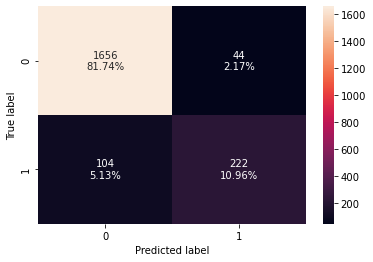

<IPython.core.display.Javascript object>

In [100]:
#Calculating different metrics
bagging_classifier_tuned_model_train_perf=model_performance_classification_sklearn(bagging_classifier_tuned,X_train,y_train)
print("Training performance:\n",bagging_classifier_tuned_model_train_perf)
bagging_classifier_tuned_model_val_perf=model_performance_classification_sklearn(bagging_classifier_tuned,X_val,y_val)
print("Validation performance:\n",bagging_classifier_tuned_model_val_perf)
#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier_tuned, X_val, y_val)

Tuning the Random Forest Estimator

In [103]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=None, n_estimators=60,
                       random_state=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy  Recall  Precision   F1
0      1.00    1.00       1.00 1.00
Validation performance:
    Accuracy  Recall  Precision   F1
0      0.92    0.66       0.82 0.73


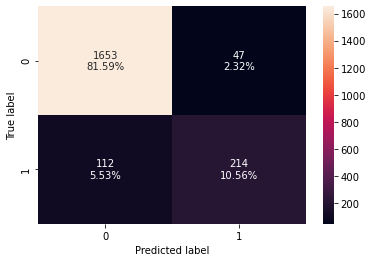

<IPython.core.display.Javascript object>

In [104]:
#Calculating different metrics
rf_estimator_tuned_model_train_perf=model_performance_classification_sklearn(rf_estimator_tuned,X_train,y_train)
print("Training performance:\n",bagging_classifier_tuned_model_train_perf)
rf_estimator_tuned_model_val_perf=model_performance_classification_sklearn(rf_estimator_tuned,X_val,y_val)
print("Validation performance:\n",rf_estimator_tuned_model_val_perf)
#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator_tuned, X_val, y_val)

Tuning the Decision Tree with Downsampled Data

In [105]:
#Choose the type of classifier. 
dtree_un_tuned = DecisionTreeClassifier(class_weight={0:0.35,1:0.65},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,10), 
              'min_samples_leaf': [5, 7, 10, 15],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_un_tuned, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_un, y_train_un)

# Set the clf to the best combination of parameters
dtree_un_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_un_tuned.fit(X_train_un, y_train_un)

DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.65}, max_depth=2,
                       max_leaf_nodes=3, min_impurity_decrease=0.0001,
                       min_samples_leaf=5, random_state=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy  Recall  Precision   F1
0      0.76    0.95       0.69 0.80
Validation performance:
    Accuracy  Recall  Precision   F1
0      0.61    0.94       0.28 0.44


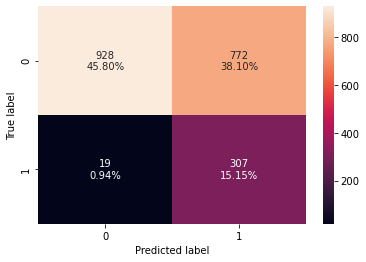

<IPython.core.display.Javascript object>

In [106]:
#Calculating different metrics
dtree_un_tuned_model_train_perf=model_performance_classification_sklearn(dtree_un_tuned,X_train_un,y_train_un)
print("Training performance:\n",dtree_un_tuned_model_train_perf)
dtree_un_tuned_model_val_perf=model_performance_classification_sklearn(dtree_un_tuned,X_val,y_val)
print("Validation performance:\n",dtree_un_tuned_model_val_perf)
#Creating confusion matrix
confusion_matrix_sklearn(dtree_un_tuned, X_val, y_val)

In [107]:
# training performance comparison

models_train_comp_df = pd.concat(
    [bagging_classifier_model_train_perf.T,
    bagging_classifier_tuned_model_train_perf.T,
    rf_estimator_model_train_perf.T,
    rf_estimator_tuned_model_train_perf.T,
    d_tree_model_train_perf.T,
    dtree_un_tuned_model_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Bagging Classifier",
    "Bagging Classifier Tuned",
    "Random Forest Estimator",
    "Random Forest Estimator Tuned",
    "Decision Tree",
    "Decision Tree Tuned",
        ]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Bagging Classifier  Bagging Classifier Tuned  \
Accuracy                 0.99                      1.00   
Recall                   0.96                      1.00   
Precision                0.99                      1.00   
F1                       0.98                      1.00   

           Random Forest Estimator  Random Forest Estimator Tuned  \
Accuracy                      1.00                           0.97   
Recall                        1.00                           0.86   
Precision                     1.00                           0.97   
F1                            1.00                           0.91   

           Decision Tree  Decision Tree Tuned  
Accuracy            1.00                 0.76  
Recall              1.00                 0.95  
Precision           1.00                 0.69  
F1                  1.00                 0.80

<IPython.core.display.Javascript object>

In [108]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [bagging_classifier_model_val_perf.T,
    bagging_classifier_tuned_model_val_perf.T,
    rf_estimator_model_val_perf.T,
    rf_estimator_tuned_model_val_perf.T,
    d_tree_model_val_perf.T,
    dtree_un_tuned_model_val_perf.T
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Bagging Classifier",
    "Bagging Classifier Tuned",
    "Random Forest Estimator",
    "Random Forest Estimator Tuned",
    "Decision Tree",
    "Decision Tree Tuned",
        ]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Bagging Classifier  Bagging Classifier Tuned  \
Accuracy                 0.92                      0.93   
Recall                   0.66                      0.68   
Precision                0.81                      0.83   
F1                       0.73                      0.75   

           Random Forest Estimator  Random Forest Estimator Tuned  \
Accuracy                      0.93                           0.92   
Recall                        0.69                           0.66   
Precision                     0.85                           0.82   
F1                            0.76                           0.73   

           Decision Tree  Decision Tree Tuned  
Accuracy            0.89                 0.61  
Recall              0.64                 0.94  
Precision           0.68                 0.28  
F1                  0.66                 0.44

<IPython.core.display.Javascript object>

Observations:
* The tuned bagging classifier improved marginally from the original model.
* The tuned random forest estimator actually performed worse than the original model across all metrics.
* The tuned decision tree model was also worse than the original model across all metrics except for recall which improved dramatically.

Tuning the Best Performing Models

Tuning the Adaboost Classifier

In [109]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.4, n_estimators=80, random_state=1)

<IPython.core.display.Javascript object>

   Accuracy  Recall  Precision   F1
0      0.95    0.79       0.89 0.84
   Accuracy  Recall  Precision   F1
0      0.94    0.76       0.86 0.81


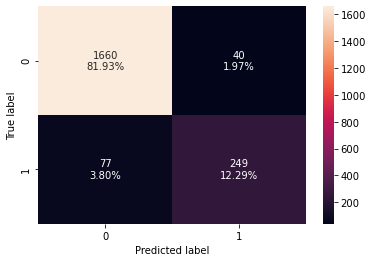

<IPython.core.display.Javascript object>

In [110]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_val_perf=model_performance_classification_sklearn(abc_tuned,X_val,y_val)
print(abc_tuned_model_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_val,y_val)

Tuning the XGBoost Classifier

In [111]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, eval_metric='logloss', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=12, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=2,
              subsample=0.7, tree_method='exact', validate_parameters=1,
              verbosity=None)

<IPython.core.display.Javascript object>

   Accuracy  Recall  Precision   F1
0      0.96    0.88       0.87 0.88
   Accuracy  Recall  Precision   F1
0      0.94    0.80       0.82 0.81


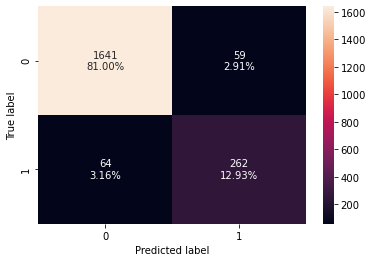

<IPython.core.display.Javascript object>

In [112]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print(xgb_tuned_model_train_perf)
xgb_tuned_model_val_perf=model_performance_classification_sklearn(xgb_tuned,X_val,y_val)
print(xgb_tuned_model_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_val,y_val)

Tuning the XGBoost Classifier with Up Sampled Data

In [113]:
# Choose the type of classifier. 
xgb_tuned_up = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned_up = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned_up.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, eval_metric='logloss', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=12, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=2,
              subsample=0.7, tree_method='exact', validate_parameters=1,
              verbosity=None)

<IPython.core.display.Javascript object>

   Accuracy  Recall  Precision   F1
0      0.95    0.98       0.92 0.95
   Accuracy  Recall  Precision   F1
0      0.90    0.88       0.64 0.74


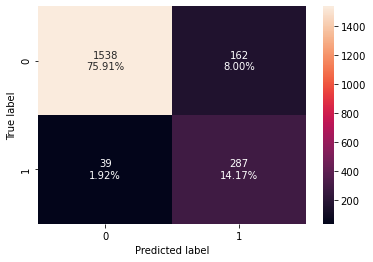

<IPython.core.display.Javascript object>

In [114]:
#Calculating different metrics
xgb_tuned_up_model_train_perf=model_performance_classification_sklearn(xgb_tuned_up,X_train_over,y_train_over)
print(xgb_tuned_up_model_train_perf)
xgb_tuned_up_model_val_perf=model_performance_classification_sklearn(xgb_tuned_up,X_val,y_val)
print(xgb_tuned_up_model_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned_up,X_val,y_val)

In [116]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
    ab_classifier_model_train_perf.T,
    abc_tuned_model_train_perf.T,
    
    xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,
    
    xgb_classifier_over_model_train_perf.T,
    xgb_tuned_up_model_train_perf.T,
    
   
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "AdaBoost Classifier",
    "Adaboost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "XGBoost Classifier Up Data",
    "XGBoost Classifier Up Data Tuned",
        ]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


AdaBoost Classifier  Adaboost Classifier Tuned  XGBoost Classifier  \
Accuracy                  0.93                       0.95                1.00   
Recall                    0.71                       0.79                1.00   
Precision                 0.81                       0.89                1.00   
F1                        0.76                       0.84                1.00   

           XGBoost Classifier Tuned  XGBoost Classifier Up Data  \
Accuracy                       0.96                        1.00   
Recall                         0.88                        1.00   
Precision                      0.87                        1.00   
F1                             0.88                        1.00   

           XGBoost Classifier Up Data Tuned  
Accuracy                               0.95  
Recall                                 0.98  
Precision                              0.92  
F1                                     0.95

<IPython.core.display.Javascript object>

In [117]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
    ab_classifier_model_val_perf.T,
    abc_tuned_model_val_perf.T,
    
    xgb_classifier_model_val_perf.T,
    xgb_tuned_model_val_perf.T,
    
    xgb_classifier_over_model_val_perf.T,
    xgb_tuned_up_model_val_perf.T,
    
   
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "AdaBoost Classifier",
    "Adaboost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "XGBoost Classifier Up Data",
    "XGBoost Classifier Up Data Tuned",
        ]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


AdaBoost Classifier  Adaboost Classifier Tuned  XGBoost Classifier  \
Accuracy                  0.93                       0.94                0.94   
Recall                    0.72                       0.76                0.76   
Precision                 0.81                       0.86                0.86   
F1                        0.77                       0.81                0.81   

           XGBoost Classifier Tuned  XGBoost Classifier Up Data  \
Accuracy                       0.94                        0.93   
Recall                         0.80                        0.81   
Precision                      0.82                        0.75   
F1                             0.81                        0.78   

           XGBoost Classifier Up Data Tuned  
Accuracy                               0.90  
Recall                                 0.88  
Precision                              0.64  
F1                                     0.74

<IPython.core.display.Javascript object>

Observations:
* The tuned Adaboost classifier model improved from the original model and is a very good model.
* The tuned XGBoost classifier model also improved from the original model across all metrics except for a slight decline in precision.
* The tuned XGBoost classifier model with over sampled data performed worse than the original model across all metrics except for recall which improved.

The model with the best overall and generalized performance is the tuned XGBoost Classifier. The model doesn't overfit the data and can accurately classify which customers are most likely to leave within ~6%.

### Productionalizing the Best Model

In [120]:
# to create pipeline and make_pipeline
from sklearn.pipeline import Pipeline, make_pipeline

# defining pipe using make_pipeline
pipe = make_pipeline(StandardScaler(), (XGBClassifier())) 

<IPython.core.display.Javascript object>

In [121]:
pipe.fit(X_train,y_train)

[09:25:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=12, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=No

<IPython.core.display.Javascript object>

In [122]:
# pipe object's accuracy on the train set
pipe.score(X_train, y_train)

0.9998353909465021

<IPython.core.display.Javascript object>

In [123]:
# pipe object's accuracy on the test set
pipe.score(X_test, y_test)

0.93928923988154

<IPython.core.display.Javascript object>

### Conclusion - Insights and Business Recommendations

**Insights**

The typical customer is 46, married, has 2 dependents, has a graduate degree or higher, has an income of over $40k, has been with the bank for 3 years and has 4 products from the bank. The typical customer also has a credit limit of about $4,550, a revolving balance of $1,276, an available balance of $3,474, utilizes their card more in Q1 compared to Q4, has spends an average of $3,899 on their credit card per year, has about 67 credit card transactions and has an average utilization ratio of .17. 

There is a large opportunity to incentivize customers to use their credit cards more. The more customers as a whole use their credit cards, the more customers will be retained.



**Reccomendations**

The company, Thera Bank, should target the following existing customers to retain on their credit card as they are highest risk of leaving their credit card:
* Customers who don't hvae a lot of credit card activity, transactions or amount.
* Customers who haven't been contacted often or in a while.
* Customers who don't have many contracts with the bank.
* Customers who have lower credit limits and a lower total revolving balance.
* Customers who have a lower Q4 to Q1 transaction count and amount; customers who don't spend as much Q4.

Good retainment solutions include:
* Contacting customers frequently.
* Getting a customer to have more than just a credit card with the bank by selling them other products they might need like a mortgage, a certificate of deposit and of course checking and savings accounts.
* Increasing customers' credit limits.
* Incentivizing customers to use their cards more with low promotional APRs and cashback opportunities.


